## EDA - Ns and Missing Values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [32]:
full_data = pd.read_csv('data/Christie_diagnosis_20180118.csv')

In [ ]:
for col in int_cols:
    print(col)
    print(full_data[col].value_counts())
    print('\n')

In [ ]:
full_data.info()

In [ ]:
feature_list = full_data.drop(columns=['Unnamed: 0', 'DX', 'DXSUB']).columns

In [ ]:
full_data.head()

In [ ]:
full_data.info()

In [ ]:
full_data['DX'].value_counts()

In [ ]:
full_data['DXSUB'].value_counts()

In [ ]:
no_null = full_data.dropna()

In [ ]:
no_null['DX'].value_counts()

In [ ]:
no_null['DXSUB'].value_counts()

In [ ]:
for col in feature_list:
    full_data.boxplot(column=col, by='DX')

## Testing Integer Stuff

In [ ]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3',
            'DX', 'DXSUB']

In [33]:
list_of_cols = list(clean_df.columns)
for col in int_cols:
    print(col)
    print(clean_df[col].value_counts())
    print('\n')

NameError: name 'clean_df' is not defined

In [ ]:
fig, axs = plt.subplots(len(int_cols)//2,2,figsize=(14,14))

for col, ax in zip(int_cols, axs.flatten()):
    ax.scatter(clean_df[col].value_counts().index, clean_df[col].value_counts())
    ax.set_title(col)

In [ ]:
for col in int_cols:
    print(col)
    print(list(full_data[col].value_counts().index.sort_values()))
    print('\n')

In [ ]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3',
            'DX', 'DXSUB']

In [ ]:
list_of_cols = list(clean_df.columns)
for col in int_cols:
    print(col)
    print(clean_df[col].value_counts())
    print('\n')

In [ ]:
fig, axs = plt.subplots(len(int_cols)//2,2,figsize=(14,14))

for col, ax in zip(int_cols, axs.flatten()):
    ax.scatter(clean_df[col].value_counts().index, clean_df[col].value_counts())
    ax.set_title(col)

In [ ]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3',
            'DX', 'DXSUB']

In [ ]:
list_of_cols = list(clean_df.columns)
for col in int_cols:
    print(col)
    print(clean_df[col].value_counts())
    print('\n')

In [ ]:
fig, axs = plt.subplots(len(int_cols)//2,2,figsize=(14,14))

for col, ax in zip(int_cols, axs.flatten()):
    ax.scatter(clean_df[col].value_counts().index, clean_df[col].value_counts())
    ax.set_title(col)

In [ ]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3',
            'DX', 'DXSUB']

In [ ]:
list_of_cols = list(clean_df.columns)
for col in int_cols:
    print(col)
    print(clean_df[col].value_counts())
    print('\n')

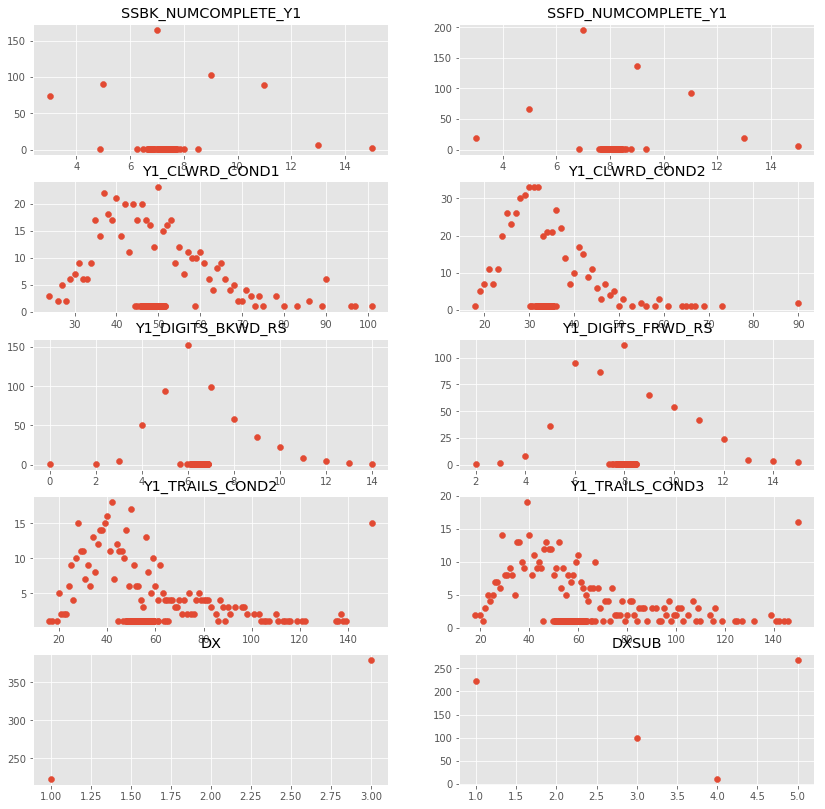

In [36]:
fig, axs = plt.subplots(len(int_cols)//2,2,figsize=(14,14))

for col, ax in zip(int_cols, axs.flatten()):
    ax.scatter(clean_df[col].value_counts().index, clean_df[col].value_counts())
    ax.set_title(col)

### Trying other imputation methods

For information on algorithms, see [fancyimpute](https://pypi.python.org/pypi/fancyimpute)

Make all the solver objects

In [56]:
from fancyimpute import *

KNN_solver = KNN(k=5)
softimpute_solver = SoftImpute()
MICE_solver = MICE()
simple_solver = SimpleFill()
iterativeSVD_solver = IterativeSVD()
matrixfactorization_solver = MatrixFactorization()

Create a dataframe from the complete data in `train_data`. Then, randomly insert some NaNs for MSE testing.

** I'm not sure if this will actually be sufficient in testing MSE, but I'm trying it anyways.

In [57]:
# Drop NaNs
complete_data = train_data.dropna()

In [58]:
# Drop DX and DXSUB
complete_data.drop(columns=['DX', 'DXSUB'], inplace=True)

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
# Randomly insert NaNs
nan_inserted_data = complete_data.copy()
import random
ix = [(row, col) for row in range(complete_data.shape[0]) for col in range(complete_data.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    nan_inserted_data.iat[row, col] = np.nan

In [60]:
missing_mask = nan_inserted_data.isna().any(axis=1)

Complete those missing dataframes with the various solvers!

In [61]:
def test_imputation(solver, df):
    """Impute the data using imputation methods"""
    impute_data = df.values
    data_index = df.index
    data_cols = df.columns

    impute_data_filled = solver.complete(impute_data)
    impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_df

In [62]:
KNN_df = test_imputation(KNN_solver, nan_inserted_data)

Imputing row 1/429 with 3 missing, elapsed time: 0.056
Imputing row 101/429 with 1 missing, elapsed time: 0.060
Imputing row 201/429 with 3 missing, elapsed time: 0.063
Imputing row 301/429 with 1 missing, elapsed time: 0.067
Imputing row 401/429 with 4 missing, elapsed time: 0.071


In [63]:
softimpute_df = test_imputation(softimpute_solver, nan_inserted_data)

[SoftImpute] Max Singular Value of X_init = 6021.288544
[SoftImpute] Iter 1: observed MAE=1.567917 rank=7
[SoftImpute] Iter 2: observed MAE=1.545347 rank=6
[SoftImpute] Iter 3: observed MAE=1.542019 rank=6
[SoftImpute] Iter 4: observed MAE=1.550035 rank=6
[SoftImpute] Iter 5: observed MAE=1.559149 rank=6
[SoftImpute] Iter 6: observed MAE=1.565335 rank=6
[SoftImpute] Iter 7: observed MAE=1.568788 rank=6
[SoftImpute] Iter 8: observed MAE=1.570754 rank=6
[SoftImpute] Iter 9: observed MAE=1.571930 rank=6
[SoftImpute] Iter 10: observed MAE=1.572682 rank=6
[SoftImpute] Iter 11: observed MAE=1.573212 rank=6
[SoftImpute] Iter 12: observed MAE=1.573578 rank=6
[SoftImpute] Iter 13: observed MAE=1.573825 rank=6
[SoftImpute] Iter 14: observed MAE=1.574020 rank=6
[SoftImpute] Iter 15: observed MAE=1.574166 rank=6
[SoftImpute] Iter 16: observed MAE=1.574285 rank=6
[SoftImpute] Iter 17: observed MAE=1.574381 rank=6
[SoftImpute] Iter 18: observed MAE=1.574457 rank=6
[SoftImpute] Iter 19: observed MAE=

/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


In [64]:
MICE_df = test_imputation(MICE_solver, nan_inserted_data)

[MICE] Completing matrix with shape (429, 35)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.010
[MICE] Starting imputation round 3/110, elapsed time 0.019
[MICE] Starting imputation round 4/110, elapsed time 0.029
[MICE] Starting imputation round 5/110, elapsed time 0.038
[MICE] Starting imputation round 6/110, elapsed time 0.051
[MICE] Starting imputation round 7/110, elapsed time 0.063
[MICE] Starting imputation round 8/110, elapsed time 0.073
[MICE] Starting imputation round 9/110, elapsed time 0.082
[MICE] Starting imputation round 10/110, elapsed time 0.090
[MICE] Starting imputation round 11/110, elapsed time 0.099
[MICE] Starting imputation round 12/110, elapsed time 0.108
[MICE] Starting imputation round 13/110, elapsed time 0.117
[MICE] Starting imputation round 14/110, elapsed time 0.125
[MICE] Starting imputation round 15/110, elapsed time 0.134
[MICE] Starting imputation round 16/110, elapsed time 0.143
[MI

In [65]:
simple_df = test_imputation(simple_solver, nan_inserted_data)

In [66]:
iterative_df = test_imputation(iterativeSVD_solver, nan_inserted_data)

[IterativeSVD] Iter 1: observed MAE=4.300512
[IterativeSVD] Iter 2: observed MAE=2.319916
[IterativeSVD] Iter 3: observed MAE=1.341935
[IterativeSVD] Iter 4: observed MAE=0.517094
[IterativeSVD] Iter 5: observed MAE=0.404114
[IterativeSVD] Iter 6: observed MAE=0.400751
[IterativeSVD] Iter 7: observed MAE=0.400295
[IterativeSVD] Iter 8: observed MAE=0.400188
[IterativeSVD] Iter 9: observed MAE=0.400120
[IterativeSVD] Iter 10: observed MAE=0.400029


/home/christie/anaconda2/envs/py36/lib/python3.6/site-packages/fancyimpute/iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


In [67]:
matrixfact_df = test_imputation(matrixfactorization_solver, nan_inserted_data)

Train on 12161 samples, validate on 1352 samples
Epoch 1/10000
 - 0s - loss: 1.1041 - val_loss: 1.0960
Epoch 2/10000
 - 0s - loss: 1.1018 - val_loss: 1.0957
Epoch 3/10000
 - 0s - loss: 1.1002 - val_loss: 1.0954
Epoch 4/10000
 - 0s - loss: 1.0986 - val_loss: 1.0951
Epoch 5/10000
 - 0s - loss: 1.0971 - val_loss: 1.0948
Epoch 6/10000
 - 0s - loss: 1.0955 - val_loss: 1.0945
Epoch 7/10000
 - 0s - loss: 1.0940 - val_loss: 1.0942
Epoch 8/10000
 - 0s - loss: 1.0923 - val_loss: 1.0939
Epoch 9/10000
 - 0s - loss: 1.0907 - val_loss: 1.0936
Epoch 10/10000
 - 0s - loss: 1.0890 - val_loss: 1.0932
Epoch 11/10000
 - 0s - loss: 1.0873 - val_loss: 1.0929
Epoch 12/10000
 - 0s - loss: 1.0856 - val_loss: 1.0926
Epoch 13/10000
 - 0s - loss: 1.0839 - val_loss: 1.0922
Epoch 14/10000
 - 0s - loss: 1.0822 - val_loss: 1.0918
Epoch 15/10000
 - 0s - loss: 1.0804 - val_loss: 1.0915
Epoch 16/10000
 - 0s - loss: 1.0787 - val_loss: 1.0911
Epoch 17/10000
 - 0s - loss: 1.0769 - val_loss: 1.0907
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8725 - val_loss: 1.0126
Epoch 150/10000
 - 0s - loss: 0.8708 - val_loss: 1.0116
Epoch 151/10000
 - 0s - loss: 0.8691 - val_loss: 1.0107
Epoch 152/10000
 - 0s - loss: 0.8674 - val_loss: 1.0097
Epoch 153/10000
 - 0s - loss: 0.8657 - val_loss: 1.0088
Epoch 154/10000
 - 0s - loss: 0.8640 - val_loss: 1.0078
Epoch 155/10000
 - 0s - loss: 0.8623 - val_loss: 1.0068
Epoch 156/10000
 - 0s - loss: 0.8606 - val_loss: 1.0058
Epoch 157/10000
 - 0s - loss: 0.8588 - val_loss: 1.0048
Epoch 158/10000
 - 0s - loss: 0.8571 - val_loss: 1.0038
Epoch 159/10000
 - 0s - loss: 0.8554 - val_loss: 1.0028
Epoch 160/10000
 - 0s - loss: 0.8536 - val_loss: 1.0018
Epoch 161/10000
 - 0s - loss: 0.8519 - val_loss: 1.0008
Epoch 162/10000
 - 0s - loss: 0.8501 - val_loss: 0.9998
Epoch 163/10000
 - 0s - loss: 0.8484 - val_loss: 0.9987
Epoch 164/10000
 - 0s - loss: 0.8466 - val_loss: 0.9977
Epoch 165/10000
 - 0s - loss: 0.8448 - val_loss: 0.9966
Epoch 166/10000
 - 0s - loss: 0.8431 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6125 - val_loss: 0.8383
Epoch 297/10000
 - 0s - loss: 0.6110 - val_loss: 0.8373
Epoch 298/10000
 - 0s - loss: 0.6095 - val_loss: 0.8362
Epoch 299/10000
 - 0s - loss: 0.6080 - val_loss: 0.8352
Epoch 300/10000
 - 0s - loss: 0.6065 - val_loss: 0.8342
Epoch 301/10000
 - 0s - loss: 0.6051 - val_loss: 0.8332
Epoch 302/10000
 - 0s - loss: 0.6036 - val_loss: 0.8322
Epoch 303/10000
 - 0s - loss: 0.6021 - val_loss: 0.8313
Epoch 304/10000
 - 0s - loss: 0.6007 - val_loss: 0.8303
Epoch 305/10000
 - 0s - loss: 0.5992 - val_loss: 0.8293
Epoch 306/10000
 - 0s - loss: 0.5978 - val_loss: 0.8283
Epoch 307/10000
 - 0s - loss: 0.5964 - val_loss: 0.8274
Epoch 308/10000
 - 0s - loss: 0.5950 - val_loss: 0.8264
Epoch 309/10000
 - 0s - loss: 0.5935 - val_loss: 0.8255
Epoch 310/10000
 - 0s - loss: 0.5921 - val_loss: 0.8245
Epoch 311/10000
 - 0s - loss: 0.5907 - val_loss: 0.8236
Epoch 312/10000
 - 0s - loss: 0.5893 - val_loss: 0.8226
Epoch 313/10000
 - 0s - loss: 0.5879 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4525 - val_loss: 0.7463
Epoch 444/10000
 - 0s - loss: 0.4518 - val_loss: 0.7460
Epoch 445/10000
 - 0s - loss: 0.4510 - val_loss: 0.7457
Epoch 446/10000
 - 0s - loss: 0.4502 - val_loss: 0.7454
Epoch 447/10000
 - 0s - loss: 0.4495 - val_loss: 0.7451
Epoch 448/10000
 - 0s - loss: 0.4487 - val_loss: 0.7448
Epoch 449/10000
 - 0s - loss: 0.4479 - val_loss: 0.7445
Epoch 450/10000
 - 0s - loss: 0.4472 - val_loss: 0.7442
Epoch 451/10000
 - 0s - loss: 0.4464 - val_loss: 0.7439
Epoch 452/10000
 - 0s - loss: 0.4457 - val_loss: 0.7436
Epoch 453/10000
 - 0s - loss: 0.4449 - val_loss: 0.7433
Epoch 454/10000
 - 0s - loss: 0.4442 - val_loss: 0.7430
Epoch 455/10000
 - 0s - loss: 0.4434 - val_loss: 0.7428
Epoch 456/10000
 - 0s - loss: 0.4427 - val_loss: 0.7425
Epoch 457/10000
 - 0s - loss: 0.4420 - val_loss: 0.7422
Epoch 458/10000
 - 0s - loss: 0.4412 - val_loss: 0.7419
Epoch 459/10000
 - 0s - loss: 0.4405 - val_loss: 0.7417
Epoch 460/10000
 - 0s - loss: 0.4398 - val_loss:

### Now cast as ints

In [68]:
solver_list = [KNN_df, softimpute_df, MICE_df,
               simple_df, iterative_df, matrixfact_df]
solver_names = ['KNN', 'SoftImpute', 'MICE', 'SimpleFill',
                   'IterativeSVD', 'MatrixFactorization']

In [69]:
KNN_df_round = KNN_df.copy()
softimpute_df_round = softimpute_df.copy()
MICE_df_round = MICE_df.copy()
simple_df_round = simple_df.copy()
iterative_df_round = iterative_df.copy()
matrixfact_df_round = matrixfact_df.copy()

In [70]:
round_list = [KNN_df_round, softimpute_df_round, MICE_df_round,
              simple_df_round, iterative_df_round, matrixfact_df_round]
round_names = ['KNN_round', 'SoftImpute_round', 'MICE_round',
            'SimpleFill_round', 'IterativeSVD_round', 'MatrixFact_round']

In [71]:
int_cols = ['SSBK_NUMCOMPLETE_Y1', 'SSFD_NUMCOMPLETE_Y1',
            'Y1_CLWRD_COND1', 'Y1_CLWRD_COND2', 'Y1_DIGITS_BKWD_RS',
            'Y1_DIGITS_FRWD_RS', 'Y1_TRAILS_COND2', 'Y1_TRAILS_COND3']
for df in round_list:
    for col in int_cols:
        df[col] = df[col].astype('int')

### Create MSEs for each

In [72]:
total_df_list = solver_list + round_list
total_df_names = solver_names + round_names

In [73]:
mse_df = pd.DataFrame(index=total_df_names, columns=complete_data.columns)

In [74]:
i = 0
for df, name in zip(total_df_list, total_df_names):
    mse = ((df[missing_mask] - complete_data[missing_mask]) ** 2).mean()
    mse_df.loc[name] = mse
    i += 1

In [75]:
mse_df

,STOP_SSRTAVE_Y1,DPRIME1_Y1,DPRIME2_Y1,SSBK_NUMCOMPLETE_Y1,SSFD_NUMCOMPLETE_Y1,V_Y1,Y1_CLWRD_COND1,Y1_CLWRD_COND2,Y1_DIGITS_BKWD_RS,Y1_DIGITS_FRWD_RS,...,Y1_P_TMCQ_SOOTHE,Y1_P_TMCQ_ASSERT,Y1_P_TMCQ_ATTFOCUS,Y1_P_TMCQ_LIP,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,Y1_P_TMCQ_SURGENCY,Y1_P_TMCQ_EFFCONT,Y1_P_TMCQ_NEGAFFECT
KNN,1308.28,0.0348855,0.0530955,0.888948,0.545594,0.0587127,7.23738,8.03836,0.3285,0.375834,...,0.0777811,0.0537728,0.172826,0.0277887,0.0829596,0.070623,0.0316686,0.0505502,0.0253666,0.0346843
SoftImpute,4385.08,0.0589374,0.0962761,1.32293,0.83592,0.107483,8.83473,3.78613,0.720364,1.02903,...,0.157713,0.108203,0.170386,0.0649409,0.108389,0.100454,0.0529039,0.0950571,0.131524,0.059072
MICE,1484.87,0.0394023,0.0363318,0.713953,0.488913,0.0360139,5.43492,5.40552,0.322933,0.320186,...,0.058416,0.0416318,0.10181,0.0258474,0.0689304,0.07013,0.02933,0.0406282,0.0160826,0.0280453
SimpleFill,1519.69,0.0481881,0.0554771,0.802498,0.532375,0.0503231,8.08539,11.6884,0.3872,0.422884,...,0.0642587,0.0406348,0.114601,0.0241089,0.0655581,0.0698347,0.0290455,0.0398583,0.0198724,0.0296163
IterativeSVD,8582.79,0.0462078,0.0256896,1.23761,0.422191,0.0516309,10.3001,3.5095,0.343938,0.374368,...,0.0453119,0.04361,0.0954928,0.0248636,0.0742375,0.0460315,0.0351447,0.0579695,0.0160876,0.0108758
MatrixFactorization,1515.01,0.0419838,0.0269502,0.585308,0.571614,0.0526186,6.73494,5.99377,0.301685,0.335536,...,0.0412826,0.0248291,0.066274,0.0196188,0.0499043,0.0476942,0.022571,0.0167174,0.00391832,0.010056
KNN_round,1308.28,0.0348855,0.0530955,0.90625,0.521635,0.0587127,7.32692,8.01683,0.365385,0.387019,...,0.0777811,0.0537728,0.172826,0.0277887,0.0829596,0.070623,0.0316686,0.0505502,0.0253666,0.0346843
SoftImpute_round,4385.08,0.0589374,0.0962761,1.41346,1.01202,0.107483,9.46635,3.92067,0.817308,1.08173,...,0.157713,0.108203,0.170386,0.0649409,0.108389,0.100454,0.0529039,0.0950571,0.131524,0.059072
MICE_round,1484.87,0.0394023,0.0363318,0.728365,0.524038,0.0360139,5.57452,5.40865,0.377404,0.346154,...,0.058416,0.0416318,0.10181,0.0258474,0.0689304,0.07013,0.02933,0.0406282,0.0160826,0.0280453
SimpleFill_round,1519.69,0.0481881,0.0554771,0.807692,0.560096,0.0503231,8.21875,11.6226,0.420673,0.432692,...,0.0642587,0.0406348,0.114601,0.0241089,0.0655581,0.0698347,0.0290455,0.0398583,0.0198724,0.0296163


### Which method has the lowest MSEs?

Write `true` for minimums in each col

In [76]:
mse_df_bool = mse_df.copy()
for col in mse_df.columns:
    mse_df_bool[col] = (mse_df_bool[col] == np.min(mse_df_bool[col]))

In [77]:
mse_df_bool.sum(axis=1)

KNN                     2
SoftImpute              0
MICE                    4
SimpleFill              0
IterativeSVD            9
MatrixFactorization    20
KNN_round               2
SoftImpute_round        0
MICE_round              1
SimpleFill_round        0
IterativeSVD_round      6
MatrixFact_round       18
dtype: int64

In [78]:
int_cols_nodx = ['SSBK_NUMCOMPLETE_Y1',
 'SSFD_NUMCOMPLETE_Y1',
 'Y1_CLWRD_COND1',
 'Y1_CLWRD_COND2',
 'Y1_DIGITS_BKWD_RS',
 'Y1_DIGITS_FRWD_RS',
 'Y1_TRAILS_COND2',
 'Y1_TRAILS_COND3']

In [79]:
mse_df_bool[int_cols_nodx].sum(axis=1)

KNN                    0
SoftImpute             0
MICE                   3
SimpleFill             0
IterativeSVD           3
MatrixFactorization    2
KNN_round              0
SoftImpute_round       0
MICE_round             0
SimpleFill_round       0
IterativeSVD_round     0
MatrixFact_round       0
dtype: int64

However, MICE seems to do the best for columns that are technically integers (3 out of 8)

### Conclusions

Looks like MatrixFactorization is the best option. (out of 38 cols, 24 went to MatrixFactorization for the lowest MSE)

Rounding does not improve the MSE. 

## EDA and First Shitty Model

In [41]:
train_data = pd.read_csv('data/train_data.csv')

In [ ]:
train_data.head()

In [ ]:
from fancyimpute import MICE

In [42]:
def clean_data(df):
    """Impute the data using Multiple Imputation"""
    impute_data = df.values
    data_index = df.index
    data_cols = df.columns

    solver = MatrixFactorization()
    impute_data_filled = solver.complete(impute_data)
    impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_df


In [43]:
clean_df = clean_data(train_data)

Train on 18875 samples, validate on 2098 samples
Epoch 1/10000
 - 0s - loss: 1.1103 - val_loss: 1.0910
Epoch 2/10000
 - 0s - loss: 1.1073 - val_loss: 1.0903
Epoch 3/10000
 - 0s - loss: 1.1057 - val_loss: 1.0895
Epoch 4/10000
 - 0s - loss: 1.1041 - val_loss: 1.0888
Epoch 5/10000
 - 0s - loss: 1.1026 - val_loss: 1.0881
Epoch 6/10000
 - 0s - loss: 1.1012 - val_loss: 1.0874
Epoch 7/10000
 - 0s - loss: 1.0997 - val_loss: 1.0867
Epoch 8/10000
 - 0s - loss: 1.0982 - val_loss: 1.0860
Epoch 9/10000
 - 0s - loss: 1.0966 - val_loss: 1.0853
Epoch 10/10000
 - 0s - loss: 1.0951 - val_loss: 1.0845
Epoch 11/10000
 - 0s - loss: 1.0935 - val_loss: 1.0838
Epoch 12/10000
 - 0s - loss: 1.0919 - val_loss: 1.0830
Epoch 13/10000
 - 0s - loss: 1.0903 - val_loss: 1.0822
Epoch 14/10000
 - 0s - loss: 1.0886 - val_loss: 1.0815
Epoch 15/10000
 - 0s - loss: 1.0870 - val_loss: 1.0807
Epoch 16/10000
 - 0s - loss: 1.0854 - val_loss: 1.0800
Epoch 17/10000
 - 0s - loss: 1.0837 - val_loss: 1.0792
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.8814 - val_loss: 0.9619
Epoch 150/10000
 - 0s - loss: 0.8795 - val_loss: 0.9606
Epoch 151/10000
 - 0s - loss: 0.8777 - val_loss: 0.9594
Epoch 152/10000
 - 0s - loss: 0.8759 - val_loss: 0.9581
Epoch 153/10000
 - 0s - loss: 0.8740 - val_loss: 0.9569
Epoch 154/10000
 - 0s - loss: 0.8722 - val_loss: 0.9556
Epoch 155/10000
 - 0s - loss: 0.8703 - val_loss: 0.9543
Epoch 156/10000
 - 0s - loss: 0.8684 - val_loss: 0.9531
Epoch 157/10000
 - 0s - loss: 0.8666 - val_loss: 0.9518
Epoch 158/10000
 - 0s - loss: 0.8647 - val_loss: 0.9505
Epoch 159/10000
 - 0s - loss: 0.8628 - val_loss: 0.9492
Epoch 160/10000
 - 0s - loss: 0.8609 - val_loss: 0.9480
Epoch 161/10000
 - 0s - loss: 0.8590 - val_loss: 0.9467
Epoch 162/10000
 - 0s - loss: 0.8571 - val_loss: 0.9454
Epoch 163/10000
 - 0s - loss: 0.8552 - val_loss: 0.9441
Epoch 164/10000
 - 0s - loss: 0.8533 - val_loss: 0.9428
Epoch 165/10000
 - 0s - loss: 0.8514 - val_loss: 0.9415
Epoch 166/10000
 - 0s - loss: 0.8495 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6151 - val_loss: 0.7818
Epoch 297/10000
 - 0s - loss: 0.6137 - val_loss: 0.7808
Epoch 298/10000
 - 0s - loss: 0.6122 - val_loss: 0.7799
Epoch 299/10000
 - 0s - loss: 0.6108 - val_loss: 0.7789
Epoch 300/10000
 - 0s - loss: 0.6093 - val_loss: 0.7779
Epoch 301/10000
 - 0s - loss: 0.6079 - val_loss: 0.7770
Epoch 302/10000
 - 0s - loss: 0.6065 - val_loss: 0.7760
Epoch 303/10000
 - 0s - loss: 0.6050 - val_loss: 0.7751
Epoch 304/10000
 - 0s - loss: 0.6036 - val_loss: 0.7741
Epoch 305/10000
 - 0s - loss: 0.6022 - val_loss: 0.7732
Epoch 306/10000
 - 0s - loss: 0.6008 - val_loss: 0.7722
Epoch 307/10000
 - 0s - loss: 0.5994 - val_loss: 0.7713
Epoch 308/10000
 - 0s - loss: 0.5980 - val_loss: 0.7704
Epoch 309/10000
 - 0s - loss: 0.5967 - val_loss: 0.7694
Epoch 310/10000
 - 0s - loss: 0.5953 - val_loss: 0.7685
Epoch 311/10000
 - 0s - loss: 0.5939 - val_loss: 0.7676
Epoch 312/10000
 - 0s - loss: 0.5926 - val_loss: 0.7667
Epoch 313/10000
 - 0s - loss: 0.5912 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4589 - val_loss: 0.6835
Epoch 444/10000
 - 0s - loss: 0.4582 - val_loss: 0.6831
Epoch 445/10000
 - 0s - loss: 0.4574 - val_loss: 0.6827
Epoch 446/10000
 - 0s - loss: 0.4567 - val_loss: 0.6823
Epoch 447/10000
 - 0s - loss: 0.4560 - val_loss: 0.6819
Epoch 448/10000
 - 0s - loss: 0.4553 - val_loss: 0.6816
Epoch 449/10000
 - 0s - loss: 0.4545 - val_loss: 0.6812
Epoch 450/10000
 - 0s - loss: 0.4538 - val_loss: 0.6808
Epoch 451/10000
 - 0s - loss: 0.4531 - val_loss: 0.6804
Epoch 452/10000
 - 0s - loss: 0.4524 - val_loss: 0.6801
Epoch 453/10000
 - 0s - loss: 0.4517 - val_loss: 0.6797
Epoch 454/10000
 - 0s - loss: 0.4510 - val_loss: 0.6794
Epoch 455/10000
 - 0s - loss: 0.4503 - val_loss: 0.6790
Epoch 456/10000
 - 0s - loss: 0.4496 - val_loss: 0.6787
Epoch 457/10000
 - 0s - loss: 0.4489 - val_loss: 0.6783
Epoch 458/10000
 - 0s - loss: 0.4482 - val_loss: 0.6780
Epoch 459/10000
 - 0s - loss: 0.4475 - val_loss: 0.6776
Epoch 460/10000
 - 0s - loss: 0.4468 - val_loss:

In [44]:
clean_df.describe()

,STOP_SSRTAVE_Y1,DPRIME1_Y1,DPRIME2_Y1,SSBK_NUMCOMPLETE_Y1,SSFD_NUMCOMPLETE_Y1,V_Y1,Y1_CLWRD_COND1,Y1_CLWRD_COND2,Y1_DIGITS_BKWD_RS,Y1_DIGITS_FRWD_RS,...,Y1_P_TMCQ_ATTFOCUS,Y1_P_TMCQ_LIP,Y1_P_TMCQ_PERCEPT,Y1_P_TMCQ_DISCOMF,Y1_P_TMCQ_OPENNESS,Y1_P_TMCQ_SURGENCY,Y1_P_TMCQ_EFFCONT,Y1_P_TMCQ_NEGAFFECT,DX,DXSUB
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,...,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,284.715779,0.816420,2.024161,7.252450,8.100779,2.821127,48.567748,33.411105,6.506384,8.035443,...,2.878769,3.698714,3.323295,2.492336,4.119497,3.680108,3.257750,2.570874,2.260365,3.170813
std,101.261144,0.567827,0.850623,2.550317,2.254010,0.729197,12.526786,8.770465,1.761723,2.051525,...,1.057596,0.543954,0.646154,0.722629,0.574976,0.570720,0.503358,0.587360,0.966312,1.805035
min,72.500000,-0.338955,-0.163147,3.000000,3.000000,0.686200,24.000000,18.000000,0.000000,2.000000,...,1.000000,1.600000,1.100000,1.000000,2.111111,1.477441,1.829945,1.177143,1.000000,1.000000
25%,210.801310,0.466066,1.480492,5.000000,7.000000,2.345450,39.000000,28.000000,5.000000,6.678487,...,2.000000,3.375000,2.900000,2.000000,3.777778,3.359091,2.884167,2.144444,1.000000,1.000000
50%,267.738141,0.724306,1.983159,7.000000,7.437177,2.765829,47.000000,32.000000,6.000000,8.000000,...,2.625000,3.750000,3.333333,2.500000,4.222222,3.698316,3.215000,2.538175,3.000000,3.000000
75%,341.085993,1.088239,2.593477,9.000000,9.000000,3.293250,55.384947,37.059793,7.000000,9.000000,...,3.937500,4.044422,3.777778,2.900000,4.555556,4.060606,3.591667,2.936429,3.000000,5.000000
max,769.960000,3.898979,4.802516,15.000000,15.000000,5.045800,101.000000,90.000000,14.000000,15.000000,...,5.000000,5.000000,5.000000,4.900000,5.000000,4.932660,4.670000,4.616667,3.000000,5.000000


### Histograms

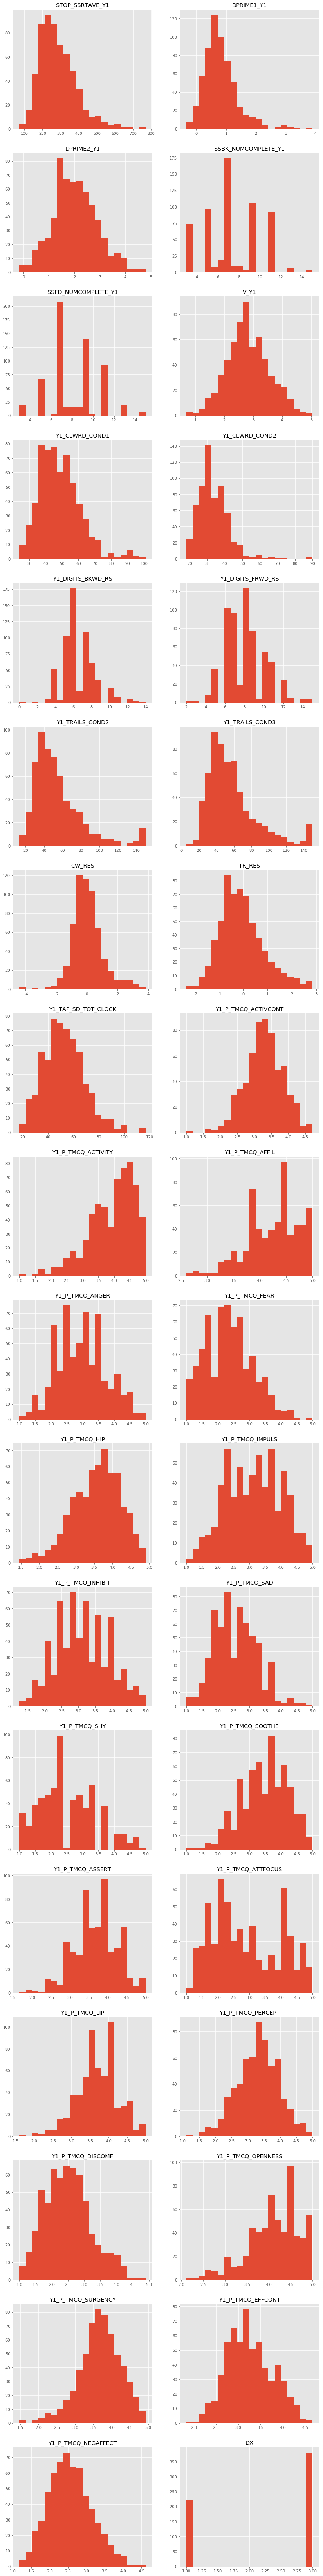

In [45]:
fig, axs = plt.subplots(len(clean_df.columns)//2,2,figsize=(14,120))

list_of_cols = list(clean_df.columns)
for col, ax in zip(list_of_cols, axs.flatten()):
    ax.hist(clean_df[col], bins=20)
    ax.set_title(col)

### Scatterplots

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
_ = scatter_matrix(clean_df, alpha=0.2, figsize=(25,25), diagonal='kde')

### Boxplots

## Logistic Regression (fsm)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split

In [148]:
X_train = train_data.drop(columns=['DX','DXSUB'])
y_train = train_data['DX']

In [149]:
logreg = LogisticRegression()

In [150]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
                    X_train, y_train, test_size=0.2, random_state=56)

In [151]:
X_train_small_impute = impute_data(X_train_small.values)

Train on 14162 samples, validate on 1574 samples
Epoch 1/10000
 - 0s - loss: 1.1240 - val_loss: 1.1024
Epoch 2/10000
 - 0s - loss: 1.1217 - val_loss: 1.1018
Epoch 3/10000
 - 0s - loss: 1.1200 - val_loss: 1.1012
Epoch 4/10000
 - 0s - loss: 1.1184 - val_loss: 1.1006
Epoch 5/10000
 - 0s - loss: 1.1169 - val_loss: 1.1000
Epoch 6/10000
 - 0s - loss: 1.1153 - val_loss: 1.0994
Epoch 7/10000
 - 0s - loss: 1.1138 - val_loss: 1.0988
Epoch 8/10000
 - 0s - loss: 1.1121 - val_loss: 1.0981
Epoch 9/10000
 - 0s - loss: 1.1105 - val_loss: 1.0975
Epoch 10/10000
 - 0s - loss: 1.1088 - val_loss: 1.0968
Epoch 11/10000
 - 0s - loss: 1.1071 - val_loss: 1.0962
Epoch 12/10000
 - 0s - loss: 1.1054 - val_loss: 1.0955
Epoch 13/10000
 - 0s - loss: 1.1037 - val_loss: 1.0948
Epoch 14/10000
 - 0s - loss: 1.1019 - val_loss: 1.0941
Epoch 15/10000
 - 0s - loss: 1.1002 - val_loss: 1.0934
Epoch 16/10000
 - 0s - loss: 1.0984 - val_loss: 1.0927
Epoch 17/10000
 - 0s - loss: 1.0967 - val_loss: 1.0920
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.9034 - val_loss: 1.0127
Epoch 150/10000
 - 0s - loss: 0.9018 - val_loss: 1.0119
Epoch 151/10000
 - 0s - loss: 0.9002 - val_loss: 1.0111
Epoch 152/10000
 - 0s - loss: 0.8987 - val_loss: 1.0102
Epoch 153/10000
 - 0s - loss: 0.8971 - val_loss: 1.0094
Epoch 154/10000
 - 0s - loss: 0.8955 - val_loss: 1.0085
Epoch 155/10000
 - 0s - loss: 0.8939 - val_loss: 1.0076
Epoch 156/10000
 - 0s - loss: 0.8923 - val_loss: 1.0067
Epoch 157/10000
 - 0s - loss: 0.8907 - val_loss: 1.0058
Epoch 158/10000
 - 0s - loss: 0.8891 - val_loss: 1.0049
Epoch 159/10000
 - 0s - loss: 0.8875 - val_loss: 1.0040
Epoch 160/10000
 - 0s - loss: 0.8858 - val_loss: 1.0031
Epoch 161/10000
 - 0s - loss: 0.8842 - val_loss: 1.0022
Epoch 162/10000
 - 0s - loss: 0.8826 - val_loss: 1.0013
Epoch 163/10000
 - 0s - loss: 0.8809 - val_loss: 1.0003
Epoch 164/10000
 - 0s - loss: 0.8793 - val_loss: 0.9994
Epoch 165/10000
 - 0s - loss: 0.8776 - val_loss: 0.9984
Epoch 166/10000
 - 0s - loss: 0.8759 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6438 - val_loss: 0.8370
Epoch 297/10000
 - 0s - loss: 0.6422 - val_loss: 0.8357
Epoch 298/10000
 - 0s - loss: 0.6406 - val_loss: 0.8345
Epoch 299/10000
 - 0s - loss: 0.6389 - val_loss: 0.8333
Epoch 300/10000
 - 0s - loss: 0.6373 - val_loss: 0.8321
Epoch 301/10000
 - 0s - loss: 0.6357 - val_loss: 0.8309
Epoch 302/10000
 - 0s - loss: 0.6341 - val_loss: 0.8297
Epoch 303/10000
 - 0s - loss: 0.6325 - val_loss: 0.8285
Epoch 304/10000
 - 0s - loss: 0.6309 - val_loss: 0.8273
Epoch 305/10000
 - 0s - loss: 0.6293 - val_loss: 0.8261
Epoch 306/10000
 - 0s - loss: 0.6278 - val_loss: 0.8249
Epoch 307/10000
 - 0s - loss: 0.6262 - val_loss: 0.8237
Epoch 308/10000
 - 0s - loss: 0.6246 - val_loss: 0.8225
Epoch 309/10000
 - 0s - loss: 0.6231 - val_loss: 0.8213
Epoch 310/10000
 - 0s - loss: 0.6215 - val_loss: 0.8202
Epoch 311/10000
 - 0s - loss: 0.6199 - val_loss: 0.8190
Epoch 312/10000
 - 0s - loss: 0.6184 - val_loss: 0.8178
Epoch 313/10000
 - 0s - loss: 0.6168 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4630 - val_loss: 0.7086
Epoch 444/10000
 - 0s - loss: 0.4622 - val_loss: 0.7081
Epoch 445/10000
 - 0s - loss: 0.4613 - val_loss: 0.7076
Epoch 446/10000
 - 0s - loss: 0.4605 - val_loss: 0.7071
Epoch 447/10000
 - 0s - loss: 0.4597 - val_loss: 0.7065
Epoch 448/10000
 - 0s - loss: 0.4588 - val_loss: 0.7061
Epoch 449/10000
 - 0s - loss: 0.4580 - val_loss: 0.7056
Epoch 450/10000
 - 0s - loss: 0.4572 - val_loss: 0.7051
Epoch 451/10000
 - 0s - loss: 0.4564 - val_loss: 0.7046
Epoch 452/10000
 - 0s - loss: 0.4556 - val_loss: 0.7041
Epoch 453/10000
 - 0s - loss: 0.4548 - val_loss: 0.7036
Epoch 454/10000
 - 0s - loss: 0.4540 - val_loss: 0.7032
Epoch 455/10000
 - 0s - loss: 0.4532 - val_loss: 0.7027
Epoch 456/10000
 - 0s - loss: 0.4524 - val_loss: 0.7022
Epoch 457/10000
 - 0s - loss: 0.4516 - val_loss: 0.7017
Epoch 458/10000
 - 0s - loss: 0.4508 - val_loss: 0.7013
Epoch 459/10000
 - 0s - loss: 0.4500 - val_loss: 0.7008
Epoch 460/10000
 - 0s - loss: 0.4492 - val_loss:

In [152]:
logreg.fit(X_train_small_impute, y_train_small.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
logreg.score(impute_data(X_test_small.values), y_test_small.values)

Train on 3627 samples, validate on 404 samples
Epoch 1/10000
 - 0s - loss: 1.0816 - val_loss: 1.1357
Epoch 2/10000
 - 0s - loss: 1.0793 - val_loss: 1.1355
Epoch 3/10000
 - 0s - loss: 1.0777 - val_loss: 1.1353
Epoch 4/10000
 - 0s - loss: 1.0761 - val_loss: 1.1351
Epoch 5/10000
 - 0s - loss: 1.0746 - val_loss: 1.1349
Epoch 6/10000
 - 0s - loss: 1.0730 - val_loss: 1.1347


0.90909090909090906

In [180]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.base import clone

In [185]:
def impute_data(X):
    """Impute the data using Matrix Factorization
    
    Parameters
    ----------
    X: np.array
       Matrix of predictors
    
    Returns
    -------
    impute_data_filled: np.array
       X, with missing values filled
    """
    #impute_data = X
    #data_index = X.index
    #data_cols = df.columns

    solver = MatrixFactorization(verbose=False)
    impute_data = solver.complete(X)
    #impute_df = pd.DataFrame(impute_data_filled, index=data_index, columns=data_cols)
    return impute_data

In [186]:
def cv(X, y, base_estimator, n_folds, metric, random_state=56):
    """Estimate the in and out-of-sample error of a model using cross validation.
    Code by Matthew Drury (madrury)
    
    Parameters
    ----------
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, random_state=random_state)
    train_cv_errors, test_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train, test) in enumerate(kf.split(X)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train], y[train]
        X_cv_test, y_cv_test = X[test], y[test]
        
        # Impute the data if missing numbers
        if np.sum(np.isnan(X_cv_train)) > 0:
            X_cv_train_final = impute_data(X_cv_train)
        else:
            X_cv_train_final = X_cv_train.copy()
        
        if np.sum(np.isnan(X_cv_test)) > 0:
            X_cv_test_final = impute_data(X_cv_test)
        else:
            X_cv_test_final = X_cv_test.copy()
            
        # Fit estimator
        estimator = clone(base_estimator)
        estimator.fit(X_cv_train_final, y_cv_train)
        
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_final)
        y_hat_test = estimator.predict(X_cv_test_final)
        
        # Calculate the error metrics
        train_cv_errors[idx] = metric(y_cv_train, y_hat_train)
        test_cv_errors[idx] = metric(y_cv_test, y_hat_test)
        #train_cv_errors[idx] = ((y_cv_train - y_hat_test) ** 2).mean()
        #print(train_cv_errors)
    
    return train_cv_errors, test_cv_errors

In [187]:
train_cv_errors, test_cv_errors = cv(X_train.values, y_train.values,
                                    LogisticRegression(), n_folds=10,
                                    metric=accuracy_score)

Train on 15989 samples, validate on 1777 samples
Epoch 1/10000
 - 1s - loss: 1.1355 - val_loss: 1.1348
Epoch 2/10000
 - 0s - loss: 1.1332 - val_loss: 1.1343
Epoch 3/10000
 - 0s - loss: 1.1314 - val_loss: 1.1338
Epoch 4/10000
 - 0s - loss: 1.1298 - val_loss: 1.1333
Epoch 5/10000
 - 0s - loss: 1.1282 - val_loss: 1.1327
Epoch 6/10000
 - 0s - loss: 1.1266 - val_loss: 1.1322
Epoch 7/10000
 - 0s - loss: 1.1250 - val_loss: 1.1316
Epoch 8/10000
 - 0s - loss: 1.1233 - val_loss: 1.1311
Epoch 9/10000
 - 0s - loss: 1.1216 - val_loss: 1.1305
Epoch 10/10000
 - 0s - loss: 1.1199 - val_loss: 1.1299
Epoch 11/10000
 - 0s - loss: 1.1181 - val_loss: 1.1293
Epoch 12/10000
 - 0s - loss: 1.1163 - val_loss: 1.1287
Epoch 13/10000
 - 0s - loss: 1.1145 - val_loss: 1.1281
Epoch 14/10000
 - 0s - loss: 1.1127 - val_loss: 1.1275
Epoch 15/10000
 - 0s - loss: 1.1109 - val_loss: 1.1269
Epoch 16/10000
 - 0s - loss: 1.1091 - val_loss: 1.1263
Epoch 17/10000
 - 0s - loss: 1.1073 - val_loss: 1.1257
Epoch 18/10000
 - 0s - lo

Epoch 149/10000
 - 0s - loss: 0.9197 - val_loss: 1.0568
Epoch 150/10000
 - 0s - loss: 0.9183 - val_loss: 1.0560
Epoch 151/10000
 - 0s - loss: 0.9168 - val_loss: 1.0553
Epoch 152/10000
 - 0s - loss: 0.9154 - val_loss: 1.0545
Epoch 153/10000
 - 0s - loss: 0.9140 - val_loss: 1.0537
Epoch 154/10000
 - 0s - loss: 0.9125 - val_loss: 1.0529
Epoch 155/10000
 - 0s - loss: 0.9111 - val_loss: 1.0521
Epoch 156/10000
 - 0s - loss: 0.9096 - val_loss: 1.0513
Epoch 157/10000
 - 0s - loss: 0.9081 - val_loss: 1.0504
Epoch 158/10000
 - 0s - loss: 0.9067 - val_loss: 1.0496
Epoch 159/10000
 - 0s - loss: 0.9052 - val_loss: 1.0487
Epoch 160/10000
 - 0s - loss: 0.9037 - val_loss: 1.0479
Epoch 161/10000
 - 0s - loss: 0.9022 - val_loss: 1.0470
Epoch 162/10000
 - 0s - loss: 0.9007 - val_loss: 1.0462
Epoch 163/10000
 - 0s - loss: 0.8992 - val_loss: 1.0453
Epoch 164/10000
 - 0s - loss: 0.8977 - val_loss: 1.0444
Epoch 165/10000
 - 0s - loss: 0.8962 - val_loss: 1.0435
Epoch 166/10000
 - 0s - loss: 0.8947 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6695 - val_loss: 0.8786
Epoch 297/10000
 - 0s - loss: 0.6678 - val_loss: 0.8774
Epoch 298/10000
 - 0s - loss: 0.6662 - val_loss: 0.8761
Epoch 299/10000
 - 0s - loss: 0.6645 - val_loss: 0.8748
Epoch 300/10000
 - 0s - loss: 0.6629 - val_loss: 0.8736
Epoch 301/10000
 - 0s - loss: 0.6613 - val_loss: 0.8723
Epoch 302/10000
 - 0s - loss: 0.6596 - val_loss: 0.8711
Epoch 303/10000
 - 0s - loss: 0.6580 - val_loss: 0.8698
Epoch 304/10000
 - 0s - loss: 0.6564 - val_loss: 0.8686
Epoch 305/10000
 - 0s - loss: 0.6548 - val_loss: 0.8673
Epoch 306/10000
 - 0s - loss: 0.6532 - val_loss: 0.8661
Epoch 307/10000
 - 0s - loss: 0.6516 - val_loss: 0.8648
Epoch 308/10000
 - 0s - loss: 0.6500 - val_loss: 0.8636
Epoch 309/10000
 - 0s - loss: 0.6484 - val_loss: 0.8624
Epoch 310/10000
 - 0s - loss: 0.6468 - val_loss: 0.8612
Epoch 311/10000
 - 0s - loss: 0.6452 - val_loss: 0.8600
Epoch 312/10000
 - 0s - loss: 0.6436 - val_loss: 0.8588
Epoch 313/10000
 - 0s - loss: 0.6420 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4838 - val_loss: 0.7431
Epoch 444/10000
 - 0s - loss: 0.4829 - val_loss: 0.7425
Epoch 445/10000
 - 0s - loss: 0.4820 - val_loss: 0.7420
Epoch 446/10000
 - 0s - loss: 0.4811 - val_loss: 0.7414
Epoch 447/10000
 - 0s - loss: 0.4803 - val_loss: 0.7409
Epoch 448/10000
 - 0s - loss: 0.4794 - val_loss: 0.7403
Epoch 449/10000
 - 0s - loss: 0.4785 - val_loss: 0.7398
Epoch 450/10000
 - 0s - loss: 0.4777 - val_loss: 0.7393
Epoch 451/10000
 - 0s - loss: 0.4768 - val_loss: 0.7387
Epoch 452/10000
 - 0s - loss: 0.4760 - val_loss: 0.7382
Epoch 453/10000
 - 0s - loss: 0.4751 - val_loss: 0.7377
Epoch 454/10000
 - 0s - loss: 0.4743 - val_loss: 0.7372
Epoch 455/10000
 - 0s - loss: 0.4734 - val_loss: 0.7366
Epoch 456/10000
 - 0s - loss: 0.4726 - val_loss: 0.7361
Epoch 457/10000
 - 0s - loss: 0.4718 - val_loss: 0.7356
Epoch 458/10000
 - 0s - loss: 0.4709 - val_loss: 0.7351
Epoch 459/10000
 - 0s - loss: 0.4701 - val_loss: 0.7346
Epoch 460/10000
 - 0s - loss: 0.4693 - val_loss:

Epoch 22/10000
 - 0s - loss: 1.0643 - val_loss: 1.0727
Epoch 23/10000
 - 0s - loss: 1.0623 - val_loss: 1.0723
Epoch 24/10000
 - 0s - loss: 1.0602 - val_loss: 1.0719
Epoch 25/10000
 - 0s - loss: 1.0581 - val_loss: 1.0715
Epoch 26/10000
 - 0s - loss: 1.0561 - val_loss: 1.0711
Epoch 27/10000
 - 0s - loss: 1.0540 - val_loss: 1.0706
Epoch 28/10000
 - 0s - loss: 1.0520 - val_loss: 1.0702
Epoch 29/10000
 - 0s - loss: 1.0500 - val_loss: 1.0698
Epoch 30/10000
 - 0s - loss: 1.0479 - val_loss: 1.0694
Epoch 31/10000
 - 0s - loss: 1.0459 - val_loss: 1.0690
Epoch 32/10000
 - 0s - loss: 1.0439 - val_loss: 1.0685
Epoch 33/10000
 - 0s - loss: 1.0419 - val_loss: 1.0681
Epoch 34/10000
 - 0s - loss: 1.0399 - val_loss: 1.0677
Epoch 35/10000
 - 0s - loss: 1.0379 - val_loss: 1.0673
Epoch 36/10000
 - 0s - loss: 1.0360 - val_loss: 1.0668
Epoch 37/10000
 - 0s - loss: 1.0340 - val_loss: 1.0664
Epoch 38/10000
 - 0s - loss: 1.0320 - val_loss: 1.0660
Epoch 39/10000
 - 0s - loss: 1.0301 - val_loss: 1.0656
Epoch 40/1

Epoch 170/10000
 - 0s - loss: 0.7911 - val_loss: 0.9537
Epoch 171/10000
 - 0s - loss: 0.7891 - val_loss: 0.9523
Epoch 172/10000
 - 0s - loss: 0.7871 - val_loss: 0.9509
Epoch 173/10000
 - 0s - loss: 0.7851 - val_loss: 0.9494
Epoch 174/10000
 - 0s - loss: 0.7831 - val_loss: 0.9480
Epoch 175/10000
 - 0s - loss: 0.7810 - val_loss: 0.9466
Epoch 176/10000
 - 0s - loss: 0.7790 - val_loss: 0.9452
Epoch 177/10000
 - 0s - loss: 0.7770 - val_loss: 0.9437
Epoch 178/10000
 - 0s - loss: 0.7750 - val_loss: 0.9423
Epoch 179/10000
 - 0s - loss: 0.7729 - val_loss: 0.9408
Epoch 180/10000
 - 0s - loss: 0.7709 - val_loss: 0.9394
Epoch 181/10000
 - 0s - loss: 0.7689 - val_loss: 0.9379
Epoch 182/10000
 - 0s - loss: 0.7668 - val_loss: 0.9365
Epoch 183/10000
 - 0s - loss: 0.7648 - val_loss: 0.9350
Epoch 184/10000
 - 0s - loss: 0.7628 - val_loss: 0.9335
Epoch 185/10000
 - 0s - loss: 0.7607 - val_loss: 0.9320
Epoch 186/10000
 - 0s - loss: 0.7587 - val_loss: 0.9306
Epoch 187/10000
 - 0s - loss: 0.7566 - val_loss:

Epoch 317/10000
 - 0s - loss: 0.5089 - val_loss: 0.7555
Epoch 318/10000
 - 0s - loss: 0.5073 - val_loss: 0.7546
Epoch 319/10000
 - 0s - loss: 0.5058 - val_loss: 0.7537
Epoch 320/10000
 - 0s - loss: 0.5042 - val_loss: 0.7528
Epoch 321/10000
 - 0s - loss: 0.5027 - val_loss: 0.7519
Epoch 322/10000
 - 0s - loss: 0.5012 - val_loss: 0.7510
Epoch 323/10000
 - 0s - loss: 0.4997 - val_loss: 0.7501
Epoch 324/10000
 - 0s - loss: 0.4982 - val_loss: 0.7492
Epoch 325/10000
 - 0s - loss: 0.4967 - val_loss: 0.7483
Epoch 326/10000
 - 0s - loss: 0.4952 - val_loss: 0.7475
Epoch 327/10000
 - 0s - loss: 0.4937 - val_loss: 0.7466
Epoch 328/10000
 - 0s - loss: 0.4922 - val_loss: 0.7458
Epoch 329/10000
 - 0s - loss: 0.4907 - val_loss: 0.7449
Epoch 330/10000
 - 0s - loss: 0.4893 - val_loss: 0.7441
Epoch 331/10000
 - 0s - loss: 0.4878 - val_loss: 0.7432
Epoch 332/10000
 - 0s - loss: 0.4864 - val_loss: 0.7424
Epoch 333/10000
 - 0s - loss: 0.4849 - val_loss: 0.7416
Epoch 334/10000
 - 0s - loss: 0.4835 - val_loss:

Epoch 464/10000
 - 0s - loss: 0.3442 - val_loss: 0.6786
Epoch 465/10000
 - 0s - loss: 0.3434 - val_loss: 0.6783
Epoch 466/10000
 - 0s - loss: 0.3426 - val_loss: 0.6781
Epoch 467/10000
 - 0s - loss: 0.3418 - val_loss: 0.6779
Epoch 468/10000
 - 0s - loss: 0.3411 - val_loss: 0.6777
Epoch 469/10000
 - 0s - loss: 0.3403 - val_loss: 0.6774
Epoch 470/10000
 - 0s - loss: 0.3395 - val_loss: 0.6773
Epoch 471/10000
 - 0s - loss: 0.3388 - val_loss: 0.6770
Epoch 472/10000
 - 0s - loss: 0.3380 - val_loss: 0.6768
Epoch 473/10000
 - 0s - loss: 0.3373 - val_loss: 0.6766
Epoch 474/10000
 - 0s - loss: 0.3365 - val_loss: 0.6764
Epoch 475/10000
 - 0s - loss: 0.3358 - val_loss: 0.6762
Epoch 476/10000
 - 0s - loss: 0.3350 - val_loss: 0.6760
Epoch 477/10000
 - 0s - loss: 0.3343 - val_loss: 0.6758
Epoch 478/10000
 - 0s - loss: 0.3335 - val_loss: 0.6757
Epoch 479/10000
 - 0s - loss: 0.3328 - val_loss: 0.6754
Epoch 480/10000
 - 0s - loss: 0.3321 - val_loss: 0.6753
Train on 15936 samples, validate on 1771 samples

Epoch 132/10000
 - 0s - loss: 0.9084 - val_loss: 1.0475
Epoch 133/10000
 - 0s - loss: 0.9068 - val_loss: 1.0464
Epoch 134/10000
 - 0s - loss: 0.9052 - val_loss: 1.0453
Epoch 135/10000
 - 0s - loss: 0.9036 - val_loss: 1.0442
Epoch 136/10000
 - 0s - loss: 0.9019 - val_loss: 1.0431
Epoch 137/10000
 - 0s - loss: 0.9003 - val_loss: 1.0420
Epoch 138/10000
 - 0s - loss: 0.8987 - val_loss: 1.0408
Epoch 139/10000
 - 0s - loss: 0.8970 - val_loss: 1.0396
Epoch 140/10000
 - 0s - loss: 0.8953 - val_loss: 1.0385
Epoch 141/10000
 - 0s - loss: 0.8937 - val_loss: 1.0373
Epoch 142/10000
 - 0s - loss: 0.8920 - val_loss: 1.0361
Epoch 143/10000
 - 0s - loss: 0.8903 - val_loss: 1.0349
Epoch 144/10000
 - 0s - loss: 0.8886 - val_loss: 1.0337
Epoch 145/10000
 - 0s - loss: 0.8869 - val_loss: 1.0325
Epoch 146/10000
 - 0s - loss: 0.8852 - val_loss: 1.0312
Epoch 147/10000
 - 0s - loss: 0.8835 - val_loss: 1.0300
Epoch 148/10000
 - 0s - loss: 0.8818 - val_loss: 1.0288
Epoch 149/10000
 - 0s - loss: 0.8801 - val_loss:

Epoch 279/10000
 - 0s - loss: 0.6379 - val_loss: 0.8326
Epoch 280/10000
 - 0s - loss: 0.6363 - val_loss: 0.8312
Epoch 281/10000
 - 0s - loss: 0.6346 - val_loss: 0.8299
Epoch 282/10000
 - 0s - loss: 0.6330 - val_loss: 0.8286
Epoch 283/10000
 - 0s - loss: 0.6313 - val_loss: 0.8273
Epoch 284/10000
 - 0s - loss: 0.6297 - val_loss: 0.8260
Epoch 285/10000
 - 0s - loss: 0.6281 - val_loss: 0.8247
Epoch 286/10000
 - 0s - loss: 0.6265 - val_loss: 0.8234
Epoch 287/10000
 - 0s - loss: 0.6249 - val_loss: 0.8222
Epoch 288/10000
 - 0s - loss: 0.6233 - val_loss: 0.8208
Epoch 289/10000
 - 0s - loss: 0.6217 - val_loss: 0.8196
Epoch 290/10000
 - 0s - loss: 0.6201 - val_loss: 0.8183
Epoch 291/10000
 - 0s - loss: 0.6185 - val_loss: 0.8171
Epoch 292/10000
 - 0s - loss: 0.6169 - val_loss: 0.8158
Epoch 293/10000
 - 0s - loss: 0.6153 - val_loss: 0.8146
Epoch 294/10000
 - 0s - loss: 0.6138 - val_loss: 0.8133
Epoch 295/10000
 - 0s - loss: 0.6122 - val_loss: 0.8121
Epoch 296/10000
 - 0s - loss: 0.6107 - val_loss:

Epoch 426/10000
 - 0s - loss: 0.4627 - val_loss: 0.7064
Epoch 427/10000
 - 0s - loss: 0.4619 - val_loss: 0.7060
Epoch 428/10000
 - 0s - loss: 0.4611 - val_loss: 0.7055
Epoch 429/10000
 - 0s - loss: 0.4603 - val_loss: 0.7051
Epoch 430/10000
 - 0s - loss: 0.4596 - val_loss: 0.7047
Epoch 431/10000
 - 0s - loss: 0.4588 - val_loss: 0.7042
Epoch 432/10000
 - 0s - loss: 0.4580 - val_loss: 0.7038
Epoch 433/10000
 - 0s - loss: 0.4572 - val_loss: 0.7034
Epoch 434/10000
 - 0s - loss: 0.4564 - val_loss: 0.7029
Epoch 435/10000
 - 0s - loss: 0.4557 - val_loss: 0.7025
Epoch 436/10000
 - 0s - loss: 0.4549 - val_loss: 0.7021
Epoch 437/10000
 - 0s - loss: 0.4542 - val_loss: 0.7017
Epoch 438/10000
 - 0s - loss: 0.4534 - val_loss: 0.7013
Epoch 439/10000
 - 0s - loss: 0.4526 - val_loss: 0.7009
Epoch 440/10000
 - 0s - loss: 0.4519 - val_loss: 0.7005
Epoch 441/10000
 - 0s - loss: 0.4511 - val_loss: 0.7001
Epoch 442/10000
 - 0s - loss: 0.4504 - val_loss: 0.6997
Epoch 443/10000
 - 0s - loss: 0.4497 - val_loss:

Epoch 55/10000
 - 0s - loss: 1.0054 - val_loss: 1.0917
Epoch 56/10000
 - 0s - loss: 1.0041 - val_loss: 1.0910
Epoch 57/10000
 - 0s - loss: 1.0027 - val_loss: 1.0904
Epoch 58/10000
 - 0s - loss: 1.0013 - val_loss: 1.0897
Epoch 59/10000
 - 0s - loss: 0.9999 - val_loss: 1.0891
Epoch 60/10000
 - 0s - loss: 0.9985 - val_loss: 1.0884
Epoch 61/10000
 - 0s - loss: 0.9972 - val_loss: 1.0877
Epoch 62/10000
 - 0s - loss: 0.9958 - val_loss: 1.0871
Epoch 63/10000
 - 0s - loss: 0.9944 - val_loss: 1.0864
Epoch 64/10000
 - 0s - loss: 0.9931 - val_loss: 1.0857
Epoch 65/10000
 - 0s - loss: 0.9917 - val_loss: 1.0850
Epoch 66/10000
 - 0s - loss: 0.9903 - val_loss: 1.0844
Epoch 67/10000
 - 0s - loss: 0.9890 - val_loss: 1.0837
Epoch 68/10000
 - 0s - loss: 0.9876 - val_loss: 1.0830
Epoch 69/10000
 - 0s - loss: 0.9862 - val_loss: 1.0823
Epoch 70/10000
 - 0s - loss: 0.9849 - val_loss: 1.0816
Epoch 71/10000
 - 0s - loss: 0.9835 - val_loss: 1.0809
Epoch 72/10000
 - 0s - loss: 0.9821 - val_loss: 1.0802
Epoch 73/1

 - 0s - loss: 0.7605 - val_loss: 0.9207
Epoch 203/10000
 - 0s - loss: 0.7585 - val_loss: 0.9192
Epoch 204/10000
 - 0s - loss: 0.7566 - val_loss: 0.9177
Epoch 205/10000
 - 0s - loss: 0.7547 - val_loss: 0.9162
Epoch 206/10000
 - 0s - loss: 0.7528 - val_loss: 0.9147
Epoch 207/10000
 - 0s - loss: 0.7508 - val_loss: 0.9132
Epoch 208/10000
 - 0s - loss: 0.7489 - val_loss: 0.9117
Epoch 209/10000
 - 0s - loss: 0.7470 - val_loss: 0.9102
Epoch 210/10000
 - 0s - loss: 0.7451 - val_loss: 0.9088
Epoch 211/10000
 - 0s - loss: 0.7432 - val_loss: 0.9073
Epoch 212/10000
 - 0s - loss: 0.7413 - val_loss: 0.9058
Epoch 213/10000
 - 0s - loss: 0.7394 - val_loss: 0.9044
Epoch 214/10000
 - 0s - loss: 0.7375 - val_loss: 0.9029
Epoch 215/10000
 - 0s - loss: 0.7356 - val_loss: 0.9015
Epoch 216/10000
 - 0s - loss: 0.7337 - val_loss: 0.9000
Epoch 217/10000
 - 0s - loss: 0.7318 - val_loss: 0.8986
Epoch 218/10000
 - 0s - loss: 0.7299 - val_loss: 0.8971
Epoch 219/10000
 - 0s - loss: 0.7281 - val_loss: 0.8957
Epoch 22

Epoch 349/10000
 - 0s - loss: 0.5321 - val_loss: 0.7555
Epoch 350/10000
 - 0s - loss: 0.5309 - val_loss: 0.7547
Epoch 351/10000
 - 0s - loss: 0.5298 - val_loss: 0.7539
Epoch 352/10000
 - 0s - loss: 0.5287 - val_loss: 0.7532
Epoch 353/10000
 - 0s - loss: 0.5275 - val_loss: 0.7524
Epoch 354/10000
 - 0s - loss: 0.5264 - val_loss: 0.7517
Epoch 355/10000
 - 0s - loss: 0.5253 - val_loss: 0.7509
Epoch 356/10000
 - 0s - loss: 0.5242 - val_loss: 0.7502
Epoch 357/10000
 - 0s - loss: 0.5231 - val_loss: 0.7494
Epoch 358/10000
 - 0s - loss: 0.5220 - val_loss: 0.7487
Epoch 359/10000
 - 0s - loss: 0.5209 - val_loss: 0.7480
Epoch 360/10000
 - 0s - loss: 0.5198 - val_loss: 0.7472
Epoch 361/10000
 - 0s - loss: 0.5187 - val_loss: 0.7465
Epoch 362/10000
 - 0s - loss: 0.5176 - val_loss: 0.7458
Epoch 363/10000
 - 0s - loss: 0.5165 - val_loss: 0.7451
Epoch 364/10000
 - 0s - loss: 0.5154 - val_loss: 0.7444
Epoch 365/10000
 - 0s - loss: 0.5144 - val_loss: 0.7437
Epoch 366/10000
 - 0s - loss: 0.5133 - val_loss:

Epoch 496/10000
 - 0s - loss: 0.4103 - val_loss: 0.6830
Epoch 497/10000
 - 0s - loss: 0.4097 - val_loss: 0.6827
Epoch 498/10000
 - 0s - loss: 0.4091 - val_loss: 0.6825
Epoch 499/10000
 - 0s - loss: 0.4085 - val_loss: 0.6822
Epoch 500/10000
 - 0s - loss: 0.4080 - val_loss: 0.6819
Epoch 501/10000
 - 0s - loss: 0.4074 - val_loss: 0.6817
Epoch 502/10000
 - 0s - loss: 0.4068 - val_loss: 0.6815
Epoch 503/10000
 - 0s - loss: 0.4063 - val_loss: 0.6812
Epoch 504/10000
 - 0s - loss: 0.4057 - val_loss: 0.6810
Epoch 505/10000
 - 0s - loss: 0.4051 - val_loss: 0.6807
Epoch 506/10000
 - 0s - loss: 0.4046 - val_loss: 0.6805
Epoch 507/10000
 - 0s - loss: 0.4040 - val_loss: 0.6802
Epoch 508/10000
 - 0s - loss: 0.4035 - val_loss: 0.6800
Epoch 509/10000
 - 0s - loss: 0.4029 - val_loss: 0.6798
Epoch 510/10000
 - 0s - loss: 0.4024 - val_loss: 0.6795
Epoch 511/10000
 - 0s - loss: 0.4018 - val_loss: 0.6793
Epoch 512/10000
 - 0s - loss: 0.4013 - val_loss: 0.6791
Epoch 513/10000
 - 0s - loss: 0.4008 - val_loss:

Epoch 97/10000
 - 0s - loss: 0.9523 - val_loss: 1.0402
Epoch 98/10000
 - 0s - loss: 0.9507 - val_loss: 1.0394
Epoch 99/10000
 - 0s - loss: 0.9492 - val_loss: 1.0383
Epoch 100/10000
 - 0s - loss: 0.9476 - val_loss: 1.0375
Epoch 101/10000
 - 0s - loss: 0.9461 - val_loss: 1.0364
Epoch 102/10000
 - 0s - loss: 0.9445 - val_loss: 1.0355
Epoch 103/10000
 - 0s - loss: 0.9429 - val_loss: 1.0345
Epoch 104/10000
 - 0s - loss: 0.9413 - val_loss: 1.0336
Epoch 105/10000
 - 0s - loss: 0.9398 - val_loss: 1.0326
Epoch 106/10000
 - 0s - loss: 0.9382 - val_loss: 1.0316
Epoch 107/10000
 - 0s - loss: 0.9366 - val_loss: 1.0306
Epoch 108/10000
 - 0s - loss: 0.9350 - val_loss: 1.0296
Epoch 109/10000
 - 0s - loss: 0.9334 - val_loss: 1.0286
Epoch 110/10000
 - 0s - loss: 0.9318 - val_loss: 1.0276
Epoch 111/10000
 - 0s - loss: 0.9302 - val_loss: 1.0266
Epoch 112/10000
 - 0s - loss: 0.9286 - val_loss: 1.0256
Epoch 113/10000
 - 0s - loss: 0.9269 - val_loss: 1.0245
Epoch 114/10000
 - 0s - loss: 0.9253 - val_loss: 1.

Epoch 244/10000
 - 0s - loss: 0.6916 - val_loss: 0.8572
Epoch 245/10000
 - 0s - loss: 0.6900 - val_loss: 0.8558
Epoch 246/10000
 - 0s - loss: 0.6883 - val_loss: 0.8547
Epoch 247/10000
 - 0s - loss: 0.6866 - val_loss: 0.8534
Epoch 248/10000
 - 0s - loss: 0.6850 - val_loss: 0.8523
Epoch 249/10000
 - 0s - loss: 0.6833 - val_loss: 0.8510
Epoch 250/10000
 - 0s - loss: 0.6817 - val_loss: 0.8499
Epoch 251/10000
 - 0s - loss: 0.6800 - val_loss: 0.8486
Epoch 252/10000
 - 0s - loss: 0.6784 - val_loss: 0.8475
Epoch 253/10000
 - 0s - loss: 0.6768 - val_loss: 0.8462
Epoch 254/10000
 - 0s - loss: 0.6752 - val_loss: 0.8451
Epoch 255/10000
 - 0s - loss: 0.6735 - val_loss: 0.8439
Epoch 256/10000
 - 0s - loss: 0.6719 - val_loss: 0.8428
Epoch 257/10000
 - 0s - loss: 0.6703 - val_loss: 0.8415
Epoch 258/10000
 - 0s - loss: 0.6687 - val_loss: 0.8404
Epoch 259/10000
 - 0s - loss: 0.6671 - val_loss: 0.8392
Epoch 260/10000
 - 0s - loss: 0.6655 - val_loss: 0.8381
Epoch 261/10000
 - 0s - loss: 0.6639 - val_loss:

Epoch 391/10000
 - 0s - loss: 0.5010 - val_loss: 0.7184
Epoch 392/10000
 - 0s - loss: 0.5000 - val_loss: 0.7177
Epoch 393/10000
 - 0s - loss: 0.4991 - val_loss: 0.7170
Epoch 394/10000
 - 0s - loss: 0.4981 - val_loss: 0.7163
Epoch 395/10000
 - 0s - loss: 0.4972 - val_loss: 0.7157
Epoch 396/10000
 - 0s - loss: 0.4963 - val_loss: 0.7150
Epoch 397/10000
 - 0s - loss: 0.4953 - val_loss: 0.7143
Epoch 398/10000
 - 0s - loss: 0.4944 - val_loss: 0.7137
Epoch 399/10000
 - 0s - loss: 0.4935 - val_loss: 0.7130
Epoch 400/10000
 - 0s - loss: 0.4926 - val_loss: 0.7124
Epoch 401/10000
 - 0s - loss: 0.4916 - val_loss: 0.7117
Epoch 402/10000
 - 0s - loss: 0.4907 - val_loss: 0.7110
Epoch 403/10000
 - 0s - loss: 0.4898 - val_loss: 0.7104
Epoch 404/10000
 - 0s - loss: 0.4889 - val_loss: 0.7098
Epoch 405/10000
 - 0s - loss: 0.4880 - val_loss: 0.7091
Epoch 406/10000
 - 0s - loss: 0.4871 - val_loss: 0.7085
Epoch 407/10000
 - 0s - loss: 0.4862 - val_loss: 0.7078
Epoch 408/10000
 - 0s - loss: 0.4853 - val_loss:

Epoch 538/10000
 - 0s - loss: 0.3972 - val_loss: 0.6513
Epoch 539/10000
 - 0s - loss: 0.3966 - val_loss: 0.6509
Epoch 540/10000
 - 0s - loss: 0.3961 - val_loss: 0.6508
Epoch 541/10000
 - 0s - loss: 0.3956 - val_loss: 0.6504
Epoch 542/10000
 - 0s - loss: 0.3951 - val_loss: 0.6503
Epoch 543/10000
 - 0s - loss: 0.3946 - val_loss: 0.6499
Epoch 544/10000
 - 0s - loss: 0.3941 - val_loss: 0.6498
Epoch 545/10000
 - 0s - loss: 0.3936 - val_loss: 0.6494
Epoch 546/10000
 - 0s - loss: 0.3931 - val_loss: 0.6493
Epoch 547/10000
 - 0s - loss: 0.3926 - val_loss: 0.6489
Epoch 548/10000
 - 0s - loss: 0.3921 - val_loss: 0.6488
Epoch 549/10000
 - 0s - loss: 0.3916 - val_loss: 0.6485
Epoch 550/10000
 - 0s - loss: 0.3911 - val_loss: 0.6483
Epoch 551/10000
 - 0s - loss: 0.3906 - val_loss: 0.6480
Epoch 552/10000
 - 0s - loss: 0.3901 - val_loss: 0.6478
Epoch 553/10000
 - 0s - loss: 0.3896 - val_loss: 0.6475
Epoch 554/10000
 - 0s - loss: 0.3891 - val_loss: 0.6473
Epoch 555/10000
 - 0s - loss: 0.3886 - val_loss:

Epoch 101/10000
 - 0s - loss: 0.9363 - val_loss: 1.0084
Epoch 102/10000
 - 0s - loss: 0.9346 - val_loss: 1.0073
Epoch 103/10000
 - 0s - loss: 0.9330 - val_loss: 1.0063
Epoch 104/10000
 - 0s - loss: 0.9314 - val_loss: 1.0052
Epoch 105/10000
 - 0s - loss: 0.9297 - val_loss: 1.0042
Epoch 106/10000
 - 0s - loss: 0.9281 - val_loss: 1.0030
Epoch 107/10000
 - 0s - loss: 0.9264 - val_loss: 1.0020
Epoch 108/10000
 - 0s - loss: 0.9247 - val_loss: 1.0009
Epoch 109/10000
 - 0s - loss: 0.9231 - val_loss: 0.9998
Epoch 110/10000
 - 0s - loss: 0.9214 - val_loss: 0.9986
Epoch 111/10000
 - 0s - loss: 0.9197 - val_loss: 0.9975
Epoch 112/10000
 - 0s - loss: 0.9181 - val_loss: 0.9964
Epoch 113/10000
 - 0s - loss: 0.9164 - val_loss: 0.9953
Epoch 114/10000
 - 0s - loss: 0.9147 - val_loss: 0.9941
Epoch 115/10000
 - 0s - loss: 0.9130 - val_loss: 0.9930
Epoch 116/10000
 - 0s - loss: 0.9113 - val_loss: 0.9918
Epoch 117/10000
 - 0s - loss: 0.9096 - val_loss: 0.9906
Epoch 118/10000
 - 0s - loss: 0.9079 - val_loss:

Epoch 248/10000
 - 0s - loss: 0.6707 - val_loss: 0.8137
Epoch 249/10000
 - 0s - loss: 0.6690 - val_loss: 0.8125
Epoch 250/10000
 - 0s - loss: 0.6674 - val_loss: 0.8112
Epoch 251/10000
 - 0s - loss: 0.6657 - val_loss: 0.8101
Epoch 252/10000
 - 0s - loss: 0.6641 - val_loss: 0.8088
Epoch 253/10000
 - 0s - loss: 0.6625 - val_loss: 0.8077
Epoch 254/10000
 - 0s - loss: 0.6608 - val_loss: 0.8064
Epoch 255/10000
 - 0s - loss: 0.6592 - val_loss: 0.8053
Epoch 256/10000
 - 0s - loss: 0.6576 - val_loss: 0.8041
Epoch 257/10000
 - 0s - loss: 0.6560 - val_loss: 0.8029
Epoch 258/10000
 - 0s - loss: 0.6544 - val_loss: 0.8017
Epoch 259/10000
 - 0s - loss: 0.6528 - val_loss: 0.8006
Epoch 260/10000
 - 0s - loss: 0.6512 - val_loss: 0.7994
Epoch 261/10000
 - 0s - loss: 0.6496 - val_loss: 0.7983
Epoch 262/10000
 - 0s - loss: 0.6480 - val_loss: 0.7971
Epoch 263/10000
 - 0s - loss: 0.6464 - val_loss: 0.7960
Epoch 264/10000
 - 0s - loss: 0.6448 - val_loss: 0.7948
Epoch 265/10000
 - 0s - loss: 0.6433 - val_loss:

Epoch 395/10000
 - 0s - loss: 0.4856 - val_loss: 0.6831
Epoch 396/10000
 - 0s - loss: 0.4847 - val_loss: 0.6824
Epoch 397/10000
 - 0s - loss: 0.4838 - val_loss: 0.6819
Epoch 398/10000
 - 0s - loss: 0.4829 - val_loss: 0.6813
Epoch 399/10000
 - 0s - loss: 0.4820 - val_loss: 0.6807
Epoch 400/10000
 - 0s - loss: 0.4811 - val_loss: 0.6801
Epoch 401/10000
 - 0s - loss: 0.4803 - val_loss: 0.6796
Epoch 402/10000
 - 0s - loss: 0.4794 - val_loss: 0.6790
Epoch 403/10000
 - 0s - loss: 0.4785 - val_loss: 0.6784
Epoch 404/10000
 - 0s - loss: 0.4777 - val_loss: 0.6778
Epoch 405/10000
 - 0s - loss: 0.4768 - val_loss: 0.6773
Epoch 406/10000
 - 0s - loss: 0.4759 - val_loss: 0.6767
Epoch 407/10000
 - 0s - loss: 0.4751 - val_loss: 0.6762
Epoch 408/10000
 - 0s - loss: 0.4742 - val_loss: 0.6756
Epoch 409/10000
 - 0s - loss: 0.4734 - val_loss: 0.6751
Epoch 410/10000
 - 0s - loss: 0.4725 - val_loss: 0.6745
Epoch 411/10000
 - 0s - loss: 0.4717 - val_loss: 0.6740
Epoch 412/10000
 - 0s - loss: 0.4709 - val_loss:

Epoch 8/10000
 - 0s - loss: 1.1022 - val_loss: 1.1377
Epoch 9/10000
 - 0s - loss: 1.1006 - val_loss: 1.1372
Epoch 10/10000
 - 0s - loss: 1.0990 - val_loss: 1.1366
Epoch 11/10000
 - 0s - loss: 1.0974 - val_loss: 1.1361
Epoch 12/10000
 - 0s - loss: 1.0958 - val_loss: 1.1355
Epoch 13/10000
 - 0s - loss: 1.0941 - val_loss: 1.1350
Epoch 14/10000
 - 0s - loss: 1.0925 - val_loss: 1.1344
Epoch 15/10000
 - 0s - loss: 1.0908 - val_loss: 1.1338
Epoch 16/10000
 - 0s - loss: 1.0891 - val_loss: 1.1333
Epoch 17/10000
 - 0s - loss: 1.0874 - val_loss: 1.1327
Epoch 18/10000
 - 0s - loss: 1.0858 - val_loss: 1.1321
Epoch 19/10000
 - 0s - loss: 1.0841 - val_loss: 1.1315
Epoch 20/10000
 - 0s - loss: 1.0824 - val_loss: 1.1310
Epoch 21/10000
 - 0s - loss: 1.0807 - val_loss: 1.1304
Epoch 22/10000
 - 0s - loss: 1.0790 - val_loss: 1.1298
Epoch 23/10000
 - 0s - loss: 1.0774 - val_loss: 1.1292
Epoch 24/10000
 - 0s - loss: 1.0757 - val_loss: 1.1286
Epoch 25/10000
 - 0s - loss: 1.0741 - val_loss: 1.1281
Epoch 26/100

Epoch 156/10000
 - 0s - loss: 0.8843 - val_loss: 1.0317
Epoch 157/10000
 - 0s - loss: 0.8826 - val_loss: 1.0306
Epoch 158/10000
 - 0s - loss: 0.8810 - val_loss: 1.0294
Epoch 159/10000
 - 0s - loss: 0.8793 - val_loss: 1.0282
Epoch 160/10000
 - 0s - loss: 0.8776 - val_loss: 1.0271
Epoch 161/10000
 - 0s - loss: 0.8758 - val_loss: 1.0259
Epoch 162/10000
 - 0s - loss: 0.8741 - val_loss: 1.0247
Epoch 163/10000
 - 0s - loss: 0.8724 - val_loss: 1.0235
Epoch 164/10000
 - 0s - loss: 0.8707 - val_loss: 1.0223
Epoch 165/10000
 - 0s - loss: 0.8689 - val_loss: 1.0211
Epoch 166/10000
 - 0s - loss: 0.8672 - val_loss: 1.0199
Epoch 167/10000
 - 0s - loss: 0.8655 - val_loss: 1.0187
Epoch 168/10000
 - 0s - loss: 0.8637 - val_loss: 1.0174
Epoch 169/10000
 - 0s - loss: 0.8620 - val_loss: 1.0162
Epoch 170/10000
 - 0s - loss: 0.8602 - val_loss: 1.0150
Epoch 171/10000
 - 0s - loss: 0.8584 - val_loss: 1.0137
Epoch 172/10000
 - 0s - loss: 0.8567 - val_loss: 1.0125
Epoch 173/10000
 - 0s - loss: 0.8549 - val_loss:

Epoch 303/10000
 - 0s - loss: 0.6260 - val_loss: 0.8544
Epoch 304/10000
 - 0s - loss: 0.6245 - val_loss: 0.8534
Epoch 305/10000
 - 0s - loss: 0.6230 - val_loss: 0.8524
Epoch 306/10000
 - 0s - loss: 0.6215 - val_loss: 0.8514
Epoch 307/10000
 - 0s - loss: 0.6199 - val_loss: 0.8504
Epoch 308/10000
 - 0s - loss: 0.6184 - val_loss: 0.8494
Epoch 309/10000
 - 0s - loss: 0.6169 - val_loss: 0.8484
Epoch 310/10000
 - 0s - loss: 0.6154 - val_loss: 0.8474
Epoch 311/10000
 - 0s - loss: 0.6139 - val_loss: 0.8464
Epoch 312/10000
 - 0s - loss: 0.6124 - val_loss: 0.8454
Epoch 313/10000
 - 0s - loss: 0.6109 - val_loss: 0.8444
Epoch 314/10000
 - 0s - loss: 0.6095 - val_loss: 0.8434
Epoch 315/10000
 - 0s - loss: 0.6080 - val_loss: 0.8424
Epoch 316/10000
 - 0s - loss: 0.6065 - val_loss: 0.8415
Epoch 317/10000
 - 0s - loss: 0.6050 - val_loss: 0.8405
Epoch 318/10000
 - 0s - loss: 0.6036 - val_loss: 0.8395
Epoch 319/10000
 - 0s - loss: 0.6021 - val_loss: 0.8386
Epoch 320/10000
 - 0s - loss: 0.6007 - val_loss:

Epoch 450/10000
 - 0s - loss: 0.4562 - val_loss: 0.7439
Epoch 451/10000
 - 0s - loss: 0.4554 - val_loss: 0.7435
Epoch 452/10000
 - 0s - loss: 0.4546 - val_loss: 0.7430
Epoch 453/10000
 - 0s - loss: 0.4538 - val_loss: 0.7425
Epoch 454/10000
 - 0s - loss: 0.4530 - val_loss: 0.7421
Epoch 455/10000
 - 0s - loss: 0.4522 - val_loss: 0.7416
Epoch 456/10000
 - 0s - loss: 0.4514 - val_loss: 0.7412
Epoch 457/10000
 - 0s - loss: 0.4506 - val_loss: 0.7407
Epoch 458/10000
 - 0s - loss: 0.4498 - val_loss: 0.7403
Epoch 459/10000
 - 0s - loss: 0.4491 - val_loss: 0.7398
Epoch 460/10000
 - 0s - loss: 0.4483 - val_loss: 0.7394
Epoch 461/10000
 - 0s - loss: 0.4475 - val_loss: 0.7389
Epoch 462/10000
 - 0s - loss: 0.4468 - val_loss: 0.7385
Epoch 463/10000
 - 0s - loss: 0.4460 - val_loss: 0.7381
Epoch 464/10000
 - 0s - loss: 0.4453 - val_loss: 0.7377
Epoch 465/10000
 - 0s - loss: 0.4445 - val_loss: 0.7372
Epoch 466/10000
 - 0s - loss: 0.4438 - val_loss: 0.7368
Epoch 467/10000
 - 0s - loss: 0.4430 - val_loss:

Epoch 41/10000
 - 0s - loss: 1.0419 - val_loss: 1.1221
Epoch 42/10000
 - 0s - loss: 1.0399 - val_loss: 1.1217
Epoch 43/10000
 - 0s - loss: 1.0380 - val_loss: 1.1212
Epoch 44/10000
 - 0s - loss: 1.0360 - val_loss: 1.1208
Epoch 45/10000
 - 0s - loss: 1.0341 - val_loss: 1.1203
Epoch 46/10000
 - 0s - loss: 1.0322 - val_loss: 1.1199
Epoch 47/10000
 - 0s - loss: 1.0303 - val_loss: 1.1195
Epoch 48/10000
 - 0s - loss: 1.0284 - val_loss: 1.1190
Epoch 49/10000
 - 0s - loss: 1.0265 - val_loss: 1.1186
Epoch 50/10000
 - 0s - loss: 1.0246 - val_loss: 1.1181
Epoch 51/10000
 - 0s - loss: 1.0227 - val_loss: 1.1177
Epoch 52/10000
 - 0s - loss: 1.0208 - val_loss: 1.1172
Epoch 53/10000
 - 0s - loss: 1.0189 - val_loss: 1.1167
Epoch 54/10000
 - 0s - loss: 1.0171 - val_loss: 1.1163
Epoch 55/10000
 - 0s - loss: 1.0152 - val_loss: 1.1158
Epoch 56/10000
 - 0s - loss: 1.0134 - val_loss: 1.1153
Epoch 57/10000
 - 0s - loss: 1.0115 - val_loss: 1.1149
Epoch 58/10000
 - 0s - loss: 1.0097 - val_loss: 1.1144
Epoch 59/1

Epoch 189/10000
 - 0s - loss: 0.7679 - val_loss: 1.0049
Epoch 190/10000
 - 0s - loss: 0.7659 - val_loss: 1.0037
Epoch 191/10000
 - 0s - loss: 0.7639 - val_loss: 1.0026
Epoch 192/10000
 - 0s - loss: 0.7619 - val_loss: 1.0014
Epoch 193/10000
 - 0s - loss: 0.7598 - val_loss: 1.0002
Epoch 194/10000
 - 0s - loss: 0.7578 - val_loss: 0.9990
Epoch 195/10000
 - 0s - loss: 0.7558 - val_loss: 0.9979
Epoch 196/10000
 - 0s - loss: 0.7538 - val_loss: 0.9967
Epoch 197/10000
 - 0s - loss: 0.7518 - val_loss: 0.9955
Epoch 198/10000
 - 0s - loss: 0.7498 - val_loss: 0.9944
Epoch 199/10000
 - 0s - loss: 0.7478 - val_loss: 0.9932
Epoch 200/10000
 - 0s - loss: 0.7458 - val_loss: 0.9920
Epoch 201/10000
 - 0s - loss: 0.7437 - val_loss: 0.9908
Epoch 202/10000
 - 0s - loss: 0.7417 - val_loss: 0.9897
Epoch 203/10000
 - 0s - loss: 0.7397 - val_loss: 0.9885
Epoch 204/10000
 - 0s - loss: 0.7377 - val_loss: 0.9873
Epoch 205/10000
 - 0s - loss: 0.7357 - val_loss: 0.9861
Epoch 206/10000
 - 0s - loss: 0.7337 - val_loss:

Epoch 336/10000
 - 0s - loss: 0.4997 - val_loss: 0.8587
Epoch 337/10000
 - 0s - loss: 0.4983 - val_loss: 0.8580
Epoch 338/10000
 - 0s - loss: 0.4968 - val_loss: 0.8575
Epoch 339/10000
 - 0s - loss: 0.4954 - val_loss: 0.8568
Epoch 340/10000
 - 0s - loss: 0.4940 - val_loss: 0.8562
Epoch 341/10000
 - 0s - loss: 0.4926 - val_loss: 0.8556
Epoch 342/10000
 - 0s - loss: 0.4912 - val_loss: 0.8550
Epoch 343/10000
 - 0s - loss: 0.4898 - val_loss: 0.8544
Epoch 344/10000
 - 0s - loss: 0.4884 - val_loss: 0.8538
Epoch 345/10000
 - 0s - loss: 0.4870 - val_loss: 0.8532
Epoch 346/10000
 - 0s - loss: 0.4856 - val_loss: 0.8527
Epoch 347/10000
 - 0s - loss: 0.4842 - val_loss: 0.8521
Epoch 348/10000
 - 0s - loss: 0.4828 - val_loss: 0.8515
Epoch 349/10000
 - 0s - loss: 0.4815 - val_loss: 0.8510
Epoch 350/10000
 - 0s - loss: 0.4801 - val_loss: 0.8504
Epoch 351/10000
 - 0s - loss: 0.4788 - val_loss: 0.8499
Epoch 352/10000
 - 0s - loss: 0.4774 - val_loss: 0.8493
Epoch 353/10000
 - 0s - loss: 0.4761 - val_loss:

Epoch 51/10000
 - 0s - loss: 1.0375 - val_loss: 1.0679
Epoch 52/10000
 - 0s - loss: 1.0360 - val_loss: 1.0675
Epoch 53/10000
 - 0s - loss: 1.0346 - val_loss: 1.0671
Epoch 54/10000
 - 0s - loss: 1.0331 - val_loss: 1.0667
Epoch 55/10000
 - 0s - loss: 1.0317 - val_loss: 1.0663
Epoch 56/10000
 - 0s - loss: 1.0303 - val_loss: 1.0659
Epoch 57/10000
 - 0s - loss: 1.0289 - val_loss: 1.0655
Epoch 58/10000
 - 0s - loss: 1.0275 - val_loss: 1.0652
Epoch 59/10000
 - 0s - loss: 1.0261 - val_loss: 1.0647
Epoch 60/10000
 - 0s - loss: 1.0247 - val_loss: 1.0644
Epoch 61/10000
 - 0s - loss: 1.0233 - val_loss: 1.0640
Epoch 62/10000
 - 0s - loss: 1.0219 - val_loss: 1.0636
Epoch 63/10000
 - 0s - loss: 1.0205 - val_loss: 1.0632
Epoch 64/10000
 - 0s - loss: 1.0191 - val_loss: 1.0628
Epoch 65/10000
 - 0s - loss: 1.0177 - val_loss: 1.0624
Epoch 66/10000
 - 0s - loss: 1.0164 - val_loss: 1.0620
Epoch 67/10000
 - 0s - loss: 1.0150 - val_loss: 1.0616
Epoch 68/10000
 - 0s - loss: 1.0137 - val_loss: 1.0612
Epoch 69/1

 - 0s - loss: 0.8064 - val_loss: 0.9565
Epoch 199/10000
 - 0s - loss: 0.8044 - val_loss: 0.9552
Epoch 200/10000
 - 0s - loss: 0.8023 - val_loss: 0.9540
Epoch 201/10000
 - 0s - loss: 0.8003 - val_loss: 0.9527
Epoch 202/10000
 - 0s - loss: 0.7983 - val_loss: 0.9514
Epoch 203/10000
 - 0s - loss: 0.7963 - val_loss: 0.9501
Epoch 204/10000
 - 0s - loss: 0.7942 - val_loss: 0.9488
Epoch 205/10000
 - 0s - loss: 0.7922 - val_loss: 0.9475
Epoch 206/10000
 - 0s - loss: 0.7902 - val_loss: 0.9462
Epoch 207/10000
 - 0s - loss: 0.7881 - val_loss: 0.9449
Epoch 208/10000
 - 0s - loss: 0.7861 - val_loss: 0.9437
Epoch 209/10000
 - 0s - loss: 0.7841 - val_loss: 0.9424
Epoch 210/10000
 - 0s - loss: 0.7820 - val_loss: 0.9411
Epoch 211/10000
 - 0s - loss: 0.7800 - val_loss: 0.9398
Epoch 212/10000
 - 0s - loss: 0.7780 - val_loss: 0.9385
Epoch 213/10000
 - 0s - loss: 0.7759 - val_loss: 0.9372
Epoch 214/10000
 - 0s - loss: 0.7739 - val_loss: 0.9359
Epoch 215/10000
 - 0s - loss: 0.7718 - val_loss: 0.9346
Epoch 21

Epoch 345/10000
 - 0s - loss: 0.5481 - val_loss: 0.7986
Epoch 346/10000
 - 0s - loss: 0.5468 - val_loss: 0.7979
Epoch 347/10000
 - 0s - loss: 0.5455 - val_loss: 0.7972
Epoch 348/10000
 - 0s - loss: 0.5443 - val_loss: 0.7965
Epoch 349/10000
 - 0s - loss: 0.5430 - val_loss: 0.7958
Epoch 350/10000
 - 0s - loss: 0.5418 - val_loss: 0.7951
Epoch 351/10000
 - 0s - loss: 0.5406 - val_loss: 0.7944
Epoch 352/10000
 - 0s - loss: 0.5393 - val_loss: 0.7937
Epoch 353/10000
 - 0s - loss: 0.5381 - val_loss: 0.7930
Epoch 354/10000
 - 0s - loss: 0.5369 - val_loss: 0.7924
Epoch 355/10000
 - 0s - loss: 0.5357 - val_loss: 0.7917
Epoch 356/10000
 - 0s - loss: 0.5345 - val_loss: 0.7911
Epoch 357/10000
 - 0s - loss: 0.5333 - val_loss: 0.7904
Epoch 358/10000
 - 0s - loss: 0.5321 - val_loss: 0.7897
Epoch 359/10000
 - 0s - loss: 0.5309 - val_loss: 0.7891
Epoch 360/10000
 - 0s - loss: 0.5298 - val_loss: 0.7884
Epoch 361/10000
 - 0s - loss: 0.5286 - val_loss: 0.7878
Epoch 362/10000
 - 0s - loss: 0.5274 - val_loss:

Epoch 3/10000
 - 0s - loss: 1.1127 - val_loss: 1.1111
Epoch 4/10000
 - 0s - loss: 1.1111 - val_loss: 1.1105
Epoch 5/10000
 - 0s - loss: 1.1095 - val_loss: 1.1100
Epoch 6/10000
 - 0s - loss: 1.1080 - val_loss: 1.1094
Epoch 7/10000
 - 0s - loss: 1.1064 - val_loss: 1.1089
Epoch 8/10000
 - 0s - loss: 1.1047 - val_loss: 1.1083
Epoch 9/10000
 - 0s - loss: 1.1031 - val_loss: 1.1077
Epoch 10/10000
 - 0s - loss: 1.1014 - val_loss: 1.1071
Epoch 11/10000
 - 0s - loss: 1.0996 - val_loss: 1.1064
Epoch 12/10000
 - 0s - loss: 1.0979 - val_loss: 1.1058
Epoch 13/10000
 - 0s - loss: 1.0962 - val_loss: 1.1052
Epoch 14/10000
 - 0s - loss: 1.0944 - val_loss: 1.1045
Epoch 15/10000
 - 0s - loss: 1.0926 - val_loss: 1.1039
Epoch 16/10000
 - 0s - loss: 1.0909 - val_loss: 1.1033
Epoch 17/10000
 - 0s - loss: 1.0891 - val_loss: 1.1026
Epoch 18/10000
 - 0s - loss: 1.0873 - val_loss: 1.1020
Epoch 19/10000
 - 0s - loss: 1.0855 - val_loss: 1.1013
Epoch 20/10000
 - 0s - loss: 1.0837 - val_loss: 1.1007
Epoch 21/10000
 -

 - 0s - loss: 0.8810 - val_loss: 1.0046
Epoch 152/10000
 - 0s - loss: 0.8793 - val_loss: 1.0034
Epoch 153/10000
 - 0s - loss: 0.8775 - val_loss: 1.0023
Epoch 154/10000
 - 0s - loss: 0.8758 - val_loss: 1.0011
Epoch 155/10000
 - 0s - loss: 0.8741 - val_loss: 0.9999
Epoch 156/10000
 - 0s - loss: 0.8723 - val_loss: 0.9987
Epoch 157/10000
 - 0s - loss: 0.8706 - val_loss: 0.9976
Epoch 158/10000
 - 0s - loss: 0.8688 - val_loss: 0.9963
Epoch 159/10000
 - 0s - loss: 0.8671 - val_loss: 0.9951
Epoch 160/10000
 - 0s - loss: 0.8653 - val_loss: 0.9939
Epoch 161/10000
 - 0s - loss: 0.8636 - val_loss: 0.9927
Epoch 162/10000
 - 0s - loss: 0.8618 - val_loss: 0.9914
Epoch 163/10000
 - 0s - loss: 0.8600 - val_loss: 0.9902
Epoch 164/10000
 - 0s - loss: 0.8582 - val_loss: 0.9889
Epoch 165/10000
 - 0s - loss: 0.8564 - val_loss: 0.9877
Epoch 166/10000
 - 0s - loss: 0.8546 - val_loss: 0.9864
Epoch 167/10000
 - 0s - loss: 0.8528 - val_loss: 0.9852
Epoch 168/10000
 - 0s - loss: 0.8510 - val_loss: 0.9838
Epoch 16

Epoch 298/10000
 - 0s - loss: 0.6147 - val_loss: 0.7930
Epoch 299/10000
 - 0s - loss: 0.6132 - val_loss: 0.7918
Epoch 300/10000
 - 0s - loss: 0.6116 - val_loss: 0.7905
Epoch 301/10000
 - 0s - loss: 0.6101 - val_loss: 0.7893
Epoch 302/10000
 - 0s - loss: 0.6086 - val_loss: 0.7880
Epoch 303/10000
 - 0s - loss: 0.6071 - val_loss: 0.7868
Epoch 304/10000
 - 0s - loss: 0.6056 - val_loss: 0.7856
Epoch 305/10000
 - 0s - loss: 0.6041 - val_loss: 0.7844
Epoch 306/10000
 - 0s - loss: 0.6027 - val_loss: 0.7831
Epoch 307/10000
 - 0s - loss: 0.6012 - val_loss: 0.7820
Epoch 308/10000
 - 0s - loss: 0.5997 - val_loss: 0.7808
Epoch 309/10000
 - 0s - loss: 0.5983 - val_loss: 0.7797
Epoch 310/10000
 - 0s - loss: 0.5968 - val_loss: 0.7784
Epoch 311/10000
 - 0s - loss: 0.5954 - val_loss: 0.7773
Epoch 312/10000
 - 0s - loss: 0.5940 - val_loss: 0.7761
Epoch 313/10000
 - 0s - loss: 0.5925 - val_loss: 0.7750
Epoch 314/10000
 - 0s - loss: 0.5911 - val_loss: 0.7738
Epoch 315/10000
 - 0s - loss: 0.5897 - val_loss:

Epoch 445/10000
 - 0s - loss: 0.4566 - val_loss: 0.6804
Epoch 446/10000
 - 0s - loss: 0.4558 - val_loss: 0.6799
Epoch 447/10000
 - 0s - loss: 0.4551 - val_loss: 0.6796
Epoch 448/10000
 - 0s - loss: 0.4544 - val_loss: 0.6791
Epoch 449/10000
 - 0s - loss: 0.4537 - val_loss: 0.6788
Epoch 450/10000
 - 0s - loss: 0.4529 - val_loss: 0.6784
Epoch 451/10000
 - 0s - loss: 0.4522 - val_loss: 0.6780
Epoch 452/10000
 - 0s - loss: 0.4515 - val_loss: 0.6776
Epoch 453/10000
 - 0s - loss: 0.4508 - val_loss: 0.6773
Epoch 454/10000
 - 0s - loss: 0.4501 - val_loss: 0.6769
Epoch 455/10000
 - 0s - loss: 0.4494 - val_loss: 0.6766
Epoch 456/10000
 - 0s - loss: 0.4487 - val_loss: 0.6761
Epoch 457/10000
 - 0s - loss: 0.4480 - val_loss: 0.6758
Epoch 458/10000
 - 0s - loss: 0.4473 - val_loss: 0.6754
Epoch 459/10000
 - 0s - loss: 0.4466 - val_loss: 0.6751
Epoch 460/10000
 - 0s - loss: 0.4459 - val_loss: 0.6747
Epoch 461/10000
 - 0s - loss: 0.4452 - val_loss: 0.6744
Epoch 462/10000
 - 0s - loss: 0.4445 - val_loss:

Epoch 64/10000
 - 0s - loss: 1.0108 - val_loss: 1.0792
Epoch 65/10000
 - 0s - loss: 1.0096 - val_loss: 1.0787
Epoch 66/10000
 - 0s - loss: 1.0083 - val_loss: 1.0783
Epoch 67/10000
 - 0s - loss: 1.0070 - val_loss: 1.0778
Epoch 68/10000
 - 0s - loss: 1.0058 - val_loss: 1.0773
Epoch 69/10000
 - 0s - loss: 1.0045 - val_loss: 1.0769
Epoch 70/10000
 - 0s - loss: 1.0033 - val_loss: 1.0764
Epoch 71/10000
 - 0s - loss: 1.0020 - val_loss: 1.0759
Epoch 72/10000
 - 0s - loss: 1.0007 - val_loss: 1.0754
Epoch 73/10000
 - 0s - loss: 0.9995 - val_loss: 1.0750
Epoch 74/10000
 - 0s - loss: 0.9983 - val_loss: 1.0745
Epoch 75/10000
 - 0s - loss: 0.9970 - val_loss: 1.0740
Epoch 76/10000
 - 0s - loss: 0.9958 - val_loss: 1.0735
Epoch 77/10000
 - 0s - loss: 0.9945 - val_loss: 1.0730
Epoch 78/10000
 - 0s - loss: 0.9933 - val_loss: 1.0725
Epoch 79/10000
 - 0s - loss: 0.9920 - val_loss: 1.0720
Epoch 80/10000
 - 0s - loss: 0.9908 - val_loss: 1.0715
Epoch 81/10000
 - 0s - loss: 0.9895 - val_loss: 1.0710
Epoch 82/1

Epoch 211/10000
 - 0s - loss: 0.7730 - val_loss: 0.9198
Epoch 212/10000
 - 0s - loss: 0.7710 - val_loss: 0.9181
Epoch 213/10000
 - 0s - loss: 0.7689 - val_loss: 0.9164
Epoch 214/10000
 - 0s - loss: 0.7669 - val_loss: 0.9147
Epoch 215/10000
 - 0s - loss: 0.7649 - val_loss: 0.9130
Epoch 216/10000
 - 0s - loss: 0.7629 - val_loss: 0.9113
Epoch 217/10000
 - 0s - loss: 0.7609 - val_loss: 0.9096
Epoch 218/10000
 - 0s - loss: 0.7589 - val_loss: 0.9079
Epoch 219/10000
 - 0s - loss: 0.7569 - val_loss: 0.9062
Epoch 220/10000
 - 0s - loss: 0.7549 - val_loss: 0.9045
Epoch 221/10000
 - 0s - loss: 0.7529 - val_loss: 0.9028
Epoch 222/10000
 - 0s - loss: 0.7510 - val_loss: 0.9012
Epoch 223/10000
 - 0s - loss: 0.7490 - val_loss: 0.8995
Epoch 224/10000
 - 0s - loss: 0.7470 - val_loss: 0.8978
Epoch 225/10000
 - 0s - loss: 0.7450 - val_loss: 0.8961
Epoch 226/10000
 - 0s - loss: 0.7431 - val_loss: 0.8945
Epoch 227/10000
 - 0s - loss: 0.7411 - val_loss: 0.8928
Epoch 228/10000
 - 0s - loss: 0.7391 - val_loss:

Epoch 358/10000
 - 0s - loss: 0.5418 - val_loss: 0.7301
Epoch 359/10000
 - 0s - loss: 0.5407 - val_loss: 0.7292
Epoch 360/10000
 - 0s - loss: 0.5396 - val_loss: 0.7284
Epoch 361/10000
 - 0s - loss: 0.5385 - val_loss: 0.7276
Epoch 362/10000
 - 0s - loss: 0.5374 - val_loss: 0.7268
Epoch 363/10000
 - 0s - loss: 0.5363 - val_loss: 0.7259
Epoch 364/10000
 - 0s - loss: 0.5352 - val_loss: 0.7252
Epoch 365/10000
 - 0s - loss: 0.5341 - val_loss: 0.7243
Epoch 366/10000
 - 0s - loss: 0.5330 - val_loss: 0.7236
Epoch 367/10000
 - 0s - loss: 0.5320 - val_loss: 0.7227
Epoch 368/10000
 - 0s - loss: 0.5309 - val_loss: 0.7220
Epoch 369/10000
 - 0s - loss: 0.5298 - val_loss: 0.7212
Epoch 370/10000
 - 0s - loss: 0.5288 - val_loss: 0.7204
Epoch 371/10000
 - 0s - loss: 0.5277 - val_loss: 0.7196
Epoch 372/10000
 - 0s - loss: 0.5266 - val_loss: 0.7189
Epoch 373/10000
 - 0s - loss: 0.5256 - val_loss: 0.7181
Epoch 374/10000
 - 0s - loss: 0.5246 - val_loss: 0.7174
Epoch 375/10000
 - 0s - loss: 0.5235 - val_loss:

Epoch 505/10000
 - 0s - loss: 0.4213 - val_loss: 0.6585
Epoch 506/10000
 - 0s - loss: 0.4207 - val_loss: 0.6584
Epoch 507/10000
 - 0s - loss: 0.4201 - val_loss: 0.6581
Epoch 508/10000
 - 0s - loss: 0.4195 - val_loss: 0.6580
Epoch 509/10000
 - 0s - loss: 0.4189 - val_loss: 0.6577
Epoch 510/10000
 - 0s - loss: 0.4183 - val_loss: 0.6576
Epoch 511/10000
 - 0s - loss: 0.4177 - val_loss: 0.6574
Epoch 512/10000
 - 0s - loss: 0.4171 - val_loss: 0.6572
Epoch 513/10000
 - 0s - loss: 0.4166 - val_loss: 0.6570
Epoch 514/10000
 - 0s - loss: 0.4160 - val_loss: 0.6568
Train on 1749 samples, validate on 195 samples
Epoch 1/10000
 - 1s - loss: 1.1159 - val_loss: 1.2142
Epoch 2/10000
 - 0s - loss: 1.1121 - val_loss: 1.2141
Epoch 3/10000
 - 0s - loss: 1.1101 - val_loss: 1.2139
Epoch 4/10000
 - 0s - loss: 1.1082 - val_loss: 1.2138
Epoch 5/10000
 - 0s - loss: 1.1064 - val_loss: 1.2137
Epoch 6/10000
 - 0s - loss: 1.1045 - val_loss: 1.2135
Train on 16006 samples, validate on 1779 samples
Epoch 1/10000
 - 1s 

Epoch 132/10000
 - 0s - loss: 0.8940 - val_loss: 1.0908
Epoch 133/10000
 - 0s - loss: 0.8923 - val_loss: 1.0897
Epoch 134/10000
 - 0s - loss: 0.8907 - val_loss: 1.0885
Epoch 135/10000
 - 0s - loss: 0.8890 - val_loss: 1.0874
Epoch 136/10000
 - 0s - loss: 0.8873 - val_loss: 1.0863
Epoch 137/10000
 - 0s - loss: 0.8857 - val_loss: 1.0851
Epoch 138/10000
 - 0s - loss: 0.8840 - val_loss: 1.0840
Epoch 139/10000
 - 0s - loss: 0.8823 - val_loss: 1.0828
Epoch 140/10000
 - 0s - loss: 0.8806 - val_loss: 1.0816
Epoch 141/10000
 - 0s - loss: 0.8789 - val_loss: 1.0805
Epoch 142/10000
 - 0s - loss: 0.8771 - val_loss: 1.0793
Epoch 143/10000
 - 0s - loss: 0.8754 - val_loss: 1.0780
Epoch 144/10000
 - 0s - loss: 0.8737 - val_loss: 1.0768
Epoch 145/10000
 - 0s - loss: 0.8720 - val_loss: 1.0756
Epoch 146/10000
 - 0s - loss: 0.8702 - val_loss: 1.0744
Epoch 147/10000
 - 0s - loss: 0.8685 - val_loss: 1.0731
Epoch 148/10000
 - 0s - loss: 0.8667 - val_loss: 1.0718
Epoch 149/10000
 - 0s - loss: 0.8649 - val_loss:

Epoch 279/10000
 - 0s - loss: 0.6256 - val_loss: 0.8781
Epoch 280/10000
 - 0s - loss: 0.6241 - val_loss: 0.8769
Epoch 281/10000
 - 0s - loss: 0.6225 - val_loss: 0.8756
Epoch 282/10000
 - 0s - loss: 0.6210 - val_loss: 0.8744
Epoch 283/10000
 - 0s - loss: 0.6194 - val_loss: 0.8732
Epoch 284/10000
 - 0s - loss: 0.6179 - val_loss: 0.8720
Epoch 285/10000
 - 0s - loss: 0.6164 - val_loss: 0.8708
Epoch 286/10000
 - 0s - loss: 0.6149 - val_loss: 0.8696
Epoch 287/10000
 - 0s - loss: 0.6133 - val_loss: 0.8684
Epoch 288/10000
 - 0s - loss: 0.6118 - val_loss: 0.8672
Epoch 289/10000
 - 0s - loss: 0.6103 - val_loss: 0.8660
Epoch 290/10000
 - 0s - loss: 0.6089 - val_loss: 0.8649
Epoch 291/10000
 - 0s - loss: 0.6074 - val_loss: 0.8637
Epoch 292/10000
 - 0s - loss: 0.6059 - val_loss: 0.8626
Epoch 293/10000
 - 0s - loss: 0.6044 - val_loss: 0.8614
Epoch 294/10000
 - 0s - loss: 0.6030 - val_loss: 0.8603
Epoch 295/10000
 - 0s - loss: 0.6015 - val_loss: 0.8592
Epoch 296/10000
 - 0s - loss: 0.6001 - val_loss:

Epoch 426/10000
 - 0s - loss: 0.4594 - val_loss: 0.7586
Epoch 427/10000
 - 0s - loss: 0.4586 - val_loss: 0.7580
Epoch 428/10000
 - 0s - loss: 0.4578 - val_loss: 0.7576
Epoch 429/10000
 - 0s - loss: 0.4570 - val_loss: 0.7571
Epoch 430/10000
 - 0s - loss: 0.4563 - val_loss: 0.7566
Epoch 431/10000
 - 0s - loss: 0.4555 - val_loss: 0.7561
Epoch 432/10000
 - 0s - loss: 0.4547 - val_loss: 0.7557
Epoch 433/10000
 - 0s - loss: 0.4539 - val_loss: 0.7551
Epoch 434/10000
 - 0s - loss: 0.4532 - val_loss: 0.7547
Epoch 435/10000
 - 0s - loss: 0.4524 - val_loss: 0.7542
Epoch 436/10000
 - 0s - loss: 0.4516 - val_loss: 0.7538
Epoch 437/10000
 - 0s - loss: 0.4509 - val_loss: 0.7533
Epoch 438/10000
 - 0s - loss: 0.4501 - val_loss: 0.7529
Epoch 439/10000
 - 0s - loss: 0.4494 - val_loss: 0.7524
Epoch 440/10000
 - 0s - loss: 0.4486 - val_loss: 0.7519
Epoch 441/10000
 - 0s - loss: 0.4479 - val_loss: 0.7515
Epoch 442/10000
 - 0s - loss: 0.4471 - val_loss: 0.7510
Epoch 443/10000
 - 0s - loss: 0.4464 - val_loss:

Epoch 6/10000
 - 0s - loss: 1.0879 - val_loss: 0.9756
Epoch 7/10000
 - 0s - loss: 1.0861 - val_loss: 0.9754
Epoch 8/10000
 - 0s - loss: 1.0844 - val_loss: 0.9752
Epoch 9/10000
 - 0s - loss: 1.0826 - val_loss: 0.9749
Epoch 10/10000
 - 0s - loss: 1.0808 - val_loss: 0.9747
Epoch 11/10000
 - 0s - loss: 1.0789 - val_loss: 0.9745
Epoch 12/10000
 - 0s - loss: 1.0771 - val_loss: 0.9743
Epoch 13/10000
 - 0s - loss: 1.0752 - val_loss: 0.9741
Epoch 14/10000
 - 0s - loss: 1.0733 - val_loss: 0.9738
Epoch 15/10000
 - 0s - loss: 1.0714 - val_loss: 0.9736
Epoch 16/10000
 - 0s - loss: 1.0695 - val_loss: 0.9734
Epoch 17/10000
 - 0s - loss: 1.0676 - val_loss: 0.9733
Epoch 18/10000
 - 0s - loss: 1.0656 - val_loss: 0.9731
Epoch 19/10000
 - 0s - loss: 1.0637 - val_loss: 0.9729
Epoch 20/10000
 - 0s - loss: 1.0618 - val_loss: 0.9727
Epoch 21/10000
 - 0s - loss: 1.0598 - val_loss: 0.9725


In [188]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))

Training CV error: 0.95
Test CV error: 0.92


In [192]:
y_train.value_counts()

3.0    380
1.0    223
Name: DX, dtype: int64

In [194]:
380/(223+380)

0.6301824212271974

In [197]:
logreg.coef_

array([[  2.91207597e-03,   5.59364518e-03,  -2.82269405e-01,
          8.21980746e-02,  -2.17817040e-02,  -2.57046203e-01,
          1.60129635e-02,   1.67663158e-02,   1.58346625e-01,
         -8.81752793e-02,   3.63952006e-03,  -1.35109801e-02,
          5.11980702e-02,  -1.55116371e-01,  -1.14344799e-02,
          4.14621009e-02,  -4.35171904e-01,   6.39141292e-01,
          5.03282459e-01,   1.51718454e-01,   3.63532798e-02,
          1.29195411e+00,  -2.19862099e-01,  -2.76742148e-01,
         -2.64164009e-02,   1.14957875e+00,  -6.11269906e-01,
         -3.06806092e+00,   1.25984424e-01,  -4.16639806e-01,
          2.94977432e-01,   2.43805460e-01,   7.06349322e-01,
         -7.38168912e-01,   3.79059808e-01]])